## ODI Men's Cricket Analysis (2002 to 2023)

   * By: Sufiyan Ahmed Khan

## Objectives of this Analysis

* Number of Matches Per Season
* Wins per team
* Most matches played on venues
* Most player of the match winners
* Toss Decision
* Top 15 Run Scorers
* Top 15 Wicket Takers in ODIs
* India v Pakistan head-to-head performance
* England vs Australia head-to-head performance
* Win percentage by toss
* Most Numbers of Wins by toss
* Top Run Scorer batsman by Year (2003-2023)
* Top Wicket Taker Bowler by Year (2003-2023)
* Most Runs and Wickets by Players from Top 6 Cricket Playing Nations

(In addition to the analysis, I've added comments throughout the code to make it easier to understand wherever possible.)

In [354]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [25]:
file_path = r"C:\Users\LENOVO\Downloads\ODI_Cricket_Match_Data.csv"

In [26]:
match_data_path = r"C:\Users\LENOVO\Downloads\ODI_Cricket_Match_Data\ODI_Match_Data.csv"

## ODI_Match_Info

In [30]:
odi_match_data = pd.read_csv(match_data_path)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_7212\791151935.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  odi_match_data = pd.read_csv(match_data_path)


In [31]:
odi_match_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1265103 entries, 0 to 1265102
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   match_id                1265103 non-null  int64  
 1   season                  1265103 non-null  object 
 2   start_date              1265103 non-null  object 
 3   venue                   1265103 non-null  object 
 4   innings                 1265103 non-null  int64  
 5   ball                    1265103 non-null  float64
 6   batting_team            1265103 non-null  object 
 7   bowling_team            1265103 non-null  object 
 8   striker                 1265103 non-null  object 
 9   non_striker             1265103 non-null  object 
 10  bowler                  1265103 non-null  object 
 11  runs_off_bat            1265103 non-null  int64  
 12  extras                  1265103 non-null  int64  
 13  wides                   28990 non-null    float64
 14  no

In [32]:
odi_match_data.head()

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.1,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
1,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.2,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
2,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.3,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
3,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.4,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389
4,1389389,2023/24,2023-09-24,"Holkar Cricket Stadium, Indore",1,0.5,India,Australia,RD Gaikwad,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1389389


In [37]:
odi_match_data.shape

(1265103, 23)

In [41]:
odi_match_data.isnull().sum()

match_id                        0
season                          0
start_date                      0
venue                           0
innings                         0
ball                            0
batting_team                    0
bowling_team                    0
striker                         0
non_striker                     0
bowler                          0
runs_off_bat                    0
extras                          0
wides                     1236113
noballs                   1260045
byes                      1263141
legbyes                   1252200
penalty                   1265085
wicket_type               1230629
player_dismissed          1230629
other_wicket_type         1265103
other_player_dismissed    1265103
cricsheet_id                    0
dtype: int64

In [47]:
# The code odi_match_data[odi_match_data.duplicated(keep=False)] is used to identify and display all the duplicate rows 
# in the odi_match_data DataFrame. 
# The keep=False argument ensures that all instances of the duplicated rows are shown, not just one of them. 
# This is useful for detecting and potentially removing duplicates in your dataset.

odi_match_data[odi_match_data.duplicated(keep=False)]

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
22333,1377770,2023,2023-07-02,"Queens Sports Club, Bulawayo",1,12.1,Zimbabwe,Sri Lanka,SC Williams,Sikandar Raza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1377770
22342,1377770,2023,2023-07-02,"Queens Sports Club, Bulawayo",1,12.1,Zimbabwe,Sri Lanka,SC Williams,Sikandar Raza,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1377770
103976,1325549,2022,2022-08-18,Harare Sports Club,2,1.1,India,Zimbabwe,Shubman Gill,S Dhawan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1325549
103985,1325549,2022,2022-08-18,Harare Sports Club,2,1.1,India,Zimbabwe,Shubman Gill,S Dhawan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1325549
368977,1130737,2017/18,2018-01-15,"Shere Bangla National Stadium, Mirpur",2,27.1,Bangladesh,Zimbabwe,Tamim Iqbal,Mushfiqur Rahim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1130737
368986,1130737,2017/18,2018-01-15,"Shere Bangla National Stadium, Mirpur",2,27.1,Bangladesh,Zimbabwe,Tamim Iqbal,Mushfiqur Rahim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1130737
542492,656425,2014/15,2015-02-23,Hagley Oval,1,1.1,England,Scotland,MM Ali,IR Bell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,656425
542501,656425,2014/15,2015-02-23,Hagley Oval,1,1.1,England,Scotland,MM Ali,IR Bell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,656425
618837,636162,2013/14,2014-01-24,Western Australia Cricket Association Ground,1,1.1,England,Australia,AN Cook,IR Bell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,636162
618846,636162,2013/14,2014-01-24,Western Australia Cricket Association Ground,1,1.1,England,Australia,AN Cook,IR Bell,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,636162


In [50]:
#removing duplicates
odi_match_data.drop_duplicates(inplace=True)

In [51]:
# The code odi_match_data.dtypes is used to check the data types of each column in the odi_match_data DataFrame. 
# It helps you understand what type of data (e.g., integer, float, object, datetime) each column contains, 
# which is important for ensuring data is processed and analyzed correctly.

odi_match_data.dtypes

match_id                    int64
season                     object
start_date                 object
venue                      object
innings                     int64
ball                      float64
batting_team               object
bowling_team               object
striker                    object
non_striker                object
bowler                     object
runs_off_bat                int64
extras                      int64
wides                     float64
noballs                   float64
byes                      float64
legbyes                   float64
penalty                   float64
wicket_type                object
player_dismissed           object
other_wicket_type         float64
other_player_dismissed    float64
cricsheet_id                int64
dtype: object

In [55]:
# The code odi_match_data.describe() is used to generate summary statistics for the numerical columns in the odi_match_data 
# DataFrame. It provides key metrics such as count, mean, standard deviation, minimum, 25th percentile, 
# median (50th percentile), 75th percentile, and maximum. 
# This is useful for getting a quick overview of the data distribution and identifying potential outliers or anomalies.

odi_match_data.describe()

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,other_wicket_type,other_player_dismissed,cricsheet_id
count,1.265088e+06,1.265088e+06,1.265088e+06,1.265088e+06,1.265088e+06,28989.000000,5058.000000,1962.000000,12903.000000,18.0,0.0,0.0,1.265088e+06
mean,7.121266e+05,1.456583e+00,2.265872e+01,7.895166e-01,4.896260e-02,1.204215,1.036576,2.056575,1.369061,5.0,NaN,NaN,7.121266e+05
std,4.282248e+05,4.982084e-01,1.382096e+01,1.255691e+00,2.944327e-01,0.792695,0.320740,1.313392,0.884183,0.0,NaN,NaN,4.282248e+05
min,6.481400e+04,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,6.481400e+04
25%,3.353520e+05,1.000000e+00,1.060000e+01,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,3.353520e+05
50%,6.490990e+05,1.000000e+00,2.210000e+01,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,5.0,NaN,NaN,6.490990e+05
75%,1.144494e+06,2.000000e+00,3.420000e+01,1.000000e+00,0.000000e+00,1.000000,1.000000,4.000000,1.000000,5.0,NaN,NaN,1.144494e+06
max,1.395701e+06,4.000000e+00,4.990000e+01,7.000000e+00,6.000000e+00,5.000000,5.000000,4.000000,5.000000,5.0,NaN,NaN,1.395701e+06


## ODI_Match_Info

In [33]:
odi_match_info = pd.read_csv(match_info_path)

In [34]:
odi_match_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2379 entries, 0 to 2378
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               2379 non-null   int64 
 1   season           2379 non-null   object
 2   city             2069 non-null   object
 3   date             2379 non-null   object
 4   team1            2379 non-null   object
 5   team2            2379 non-null   object
 6   toss_winner      2379 non-null   object
 7   toss_decision    2379 non-null   object
 8   result           2379 non-null   object
 9   dl_applied       2379 non-null   int64 
 10  winner           2259 non-null   object
 11  win_by_runs      2379 non-null   int64 
 12  win_by_wickets   2379 non-null   int64 
 13  player_of_match  2228 non-null   object
 14  venue            2379 non-null   object
 15  umpire1          2379 non-null   object
 16  umpire2          2379 non-null   object
 17  umpire3          2097 non-null   

In [35]:
odi_match_info.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1389389,2023/24,Indore,2023/09/24,India,Australia,Australia,field,D/L,1,India,99,0,SS Iyer,"Holkar Cricket Stadium, Indore",J Madanagopal,HDPK Dharmasena,KN Ananthapadmanabhan
1,1336129,2023,Nottingham,2023/09/23,England,Ireland,Ireland,field,normal,0,England,48,0,WG Jacks,"Trent Bridge, Nottingham",DJ Millns,RJ Tucker,PR Reiffel
2,1395701,2023,Dhaka,2023/09/23,New Zealand,Bangladesh,New Zealand,bat,normal,0,New Zealand,86,0,IS Sodhi,"Shere Bangla National Stadium, Mirpur",M Erasmus,Sharfuddoula,Nitin Menon
3,1389388,2023/24,Chandigarh,2023/09/22,Australia,India,India,field,normal,0,India,0,5,Mohammed Shami,"Punjab Cricket Association IS Bindra Stadium, ...",KN Ananthapadmanabhan,HDPK Dharmasena,J Madanagopal
4,1395700,2023,Dhaka,2023/09/21,New Zealand,Bangladesh,Bangladesh,field,normal,0,NaN,0,0,NaN,"Shere Bangla National Stadium, Mirpur",Nitin Menon,Sharfuddoula,M Erasmus


In [42]:
odi_match_info.shape

(2379, 18)

In [44]:
odi_match_info.isnull().sum()

id                   0
season               0
city               310
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner             120
win_by_runs          0
win_by_wickets       0
player_of_match    151
venue                0
umpire1              0
umpire2              0
umpire3            282
dtype: int64

In [48]:
odi_match_info[odi_match_info.duplicated(keep=False)]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3


In [52]:
#removing duplicates
odi_match_info.drop_duplicates(inplace=True)

In [53]:
odi_match_info.dtypes

id                  int64
season             object
city               object
date               object
team1              object
team2              object
toss_winner        object
toss_decision      object
result             object
dl_applied          int64
winner             object
win_by_runs         int64
win_by_wickets      int64
player_of_match    object
venue              object
umpire1            object
umpire2            object
umpire3            object
dtype: object

In [54]:
odi_match_info.describe()

,id,dl_applied,win_by_runs,win_by_wickets
count,2.379000e+03,2379.000000,2379.000000,2379.000000
mean,7.114354e+05,0.084489,34.680538,2.750736
std,4.287345e+05,0.278179,53.989592,3.238695
min,6.481400e+04,0.000000,0.000000,0.000000
25%,3.353495e+05,0.000000,0.000000,0.000000
50%,6.490950e+05,0.000000,0.000000,0.000000
75%,1.144488e+06,0.000000,58.000000,6.000000
max,1.395701e+06,1.000000,317.000000,10.000000


In [56]:
#exploring categorical columns

# The code odi_match_info['team1'].value_counts() is used to count the occurrences 
# of each unique value in the 'team1' column of the odi_match_info DataFrame. 
# This helps you understand how many times each team appears as team1 in the dataset, 
# providing insights into the distribution of matches among different teams.

odi_match_info['team1'].value_counts()

Australia                   254
India                       252
England                     225
Sri Lanka                   192
Bangladesh                  191
New Zealand                 182
South Africa                172
West Indies                 172
Zimbabwe                    144
Pakistan                    139
Ireland                      83
Afghanistan                  66
Scotland                     50
United Arab Emirates         47
Netherlands                  26
Kenya                        25
Canada                       24
Namibia                      23
Papua New Guinea             23
Oman                         22
United States of America     22
Nepal                        21
Hong Kong                    10
Bermuda                       7
Africa XI                     5
Jersey                        2
Name: team1, dtype: int64

In [57]:
# The code odi_match_info['city'].value_counts() is used to count how many times each city appears in the 'city' column 
# of the odi_match_info DataFrame. This helps you understand the distribution of matches across different cities, 
# identifying which cities have hosted the most matches.

odi_match_info['city'].value_counts()

Mirpur              89
Colombo             87
London              83
Bulawayo            63
Harare              57
                    ..
Jamshedpur           1
Lincoln              1
Bready               1
Tarouba              1
Pietermaritzburg     1
Name: city, Length: 145, dtype: int64

## Number of Matches Per Season

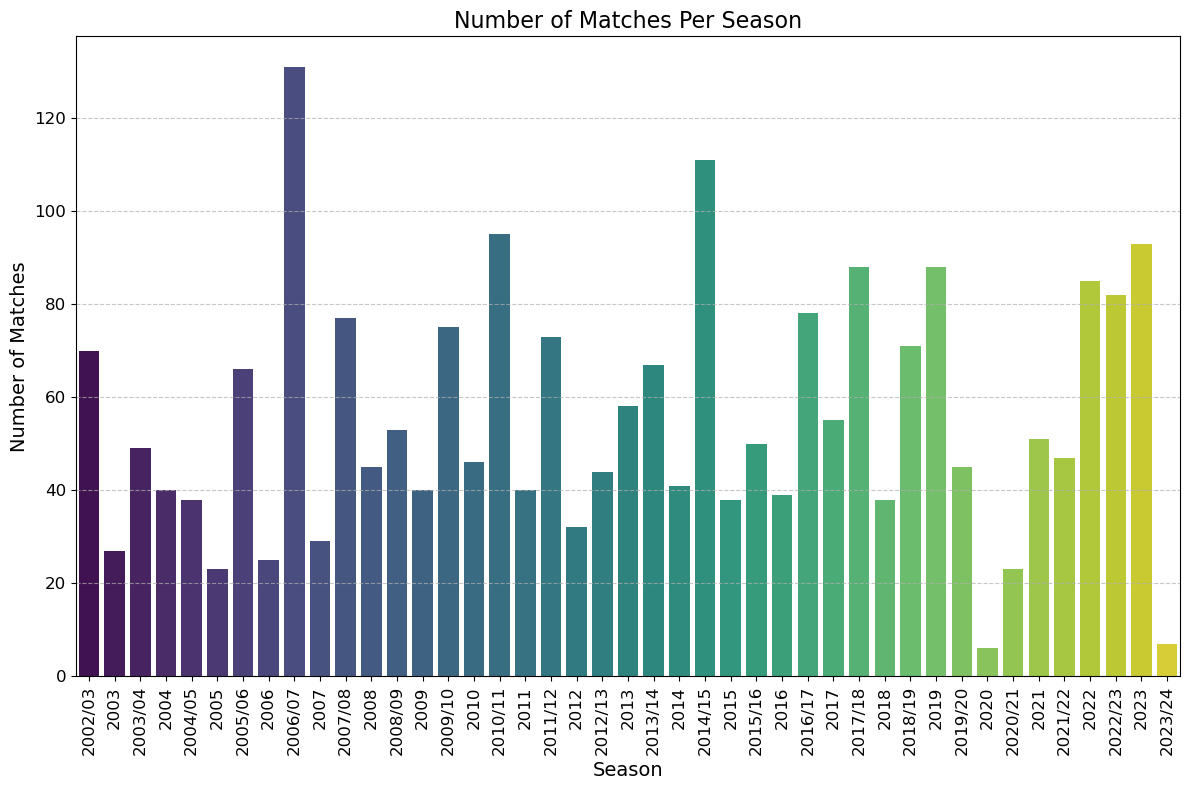

In [61]:
plt.figure(figsize=(12, 8))
sns.countplot(x='season', data=odi_match_info, palette='viridis', order=sorted(odi_match_info['season'].unique()))

plt.title('Number of Matches Per Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of Matches', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

In [66]:
# This code is used to count the number of matches played in each season (year) and then sort the results by season in 
# chronological order. This helps you organize and analyze the frequency of matches over time, 
# making it easier to spot trends and patterns across different seasons.

matches_per_season = odi_match_info['season'].value_counts().sort_index()

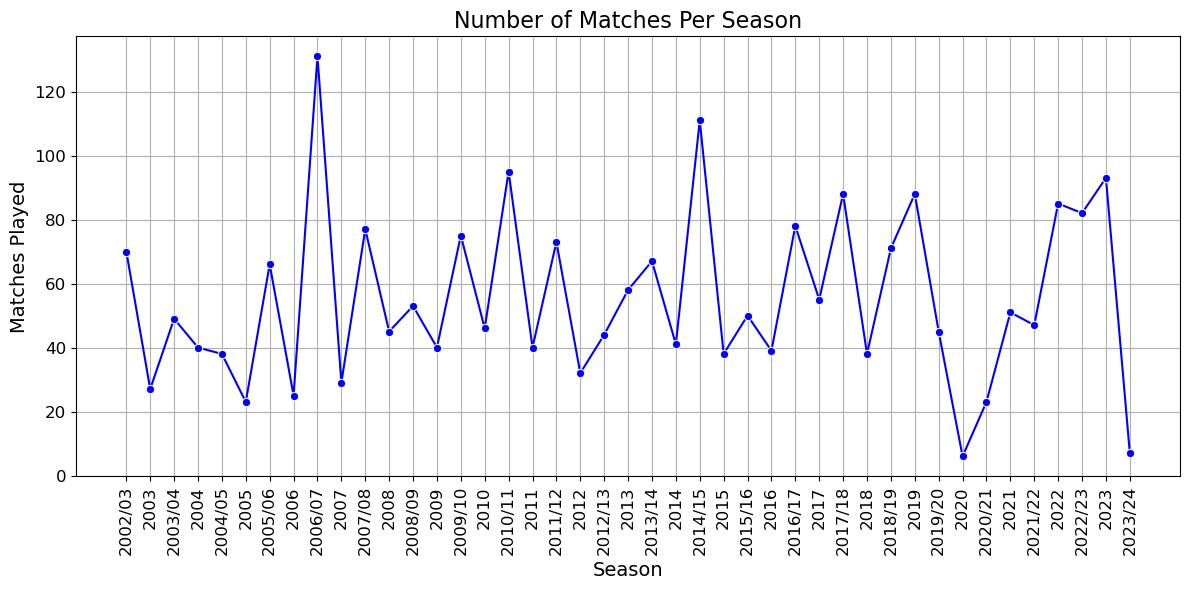

In [69]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=matches_per_season.index, y=matches_per_season, marker='o', linestyle='-', color='blue')

# Enhancements
plt.title('Number of Matches Per Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Matches Played', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()

## Wins per team

In [284]:
#calculation wins per team
team_wins = odi_match_info['winner'].value_counts()

# This code is used to calculate the number of matches won by each team. It counts how many times each team appears 
# as the winner in the 'winner' column of the odi_match_info DataFrame,
# providing a summary of team performance in terms of total wins.

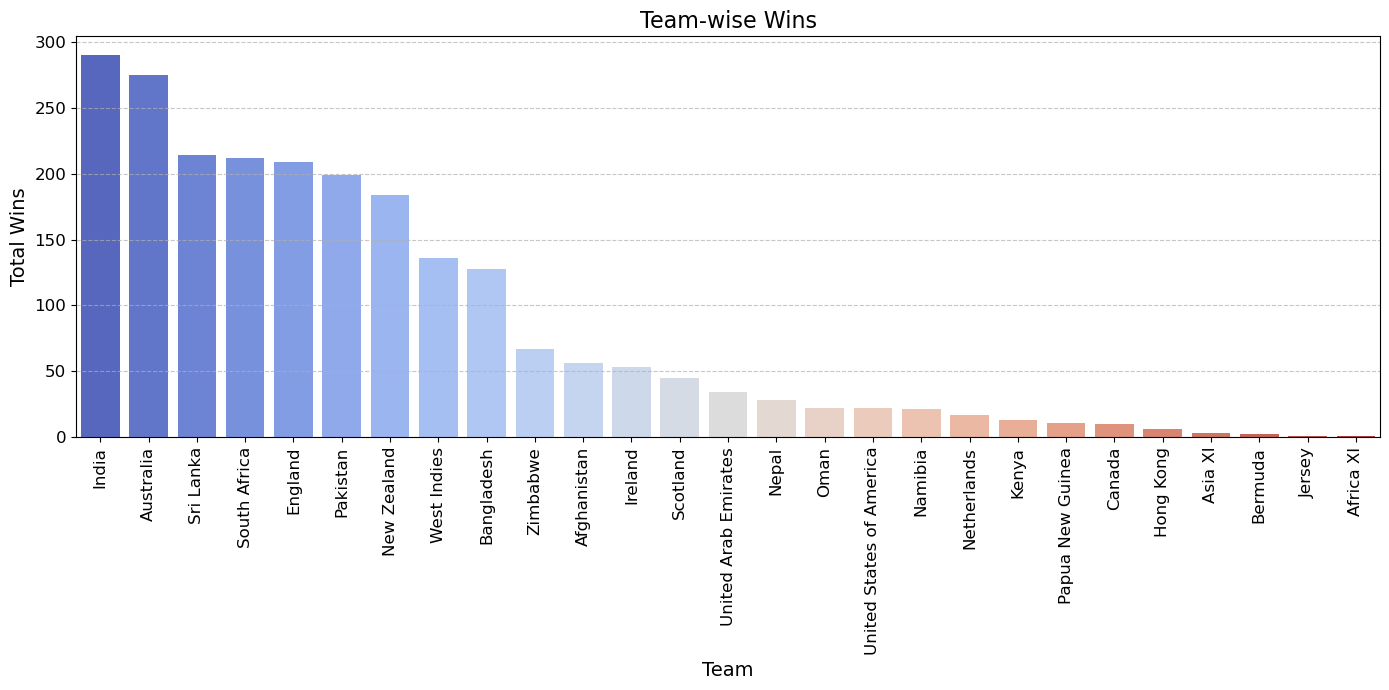

In [74]:
plt.figure(figsize=(14, 7))
sns.barplot(x=team_wins.index, y=team_wins.values, palette='coolwarm')

# Enhancements
plt.title('Team-wise Wins', fontsize=16)
plt.xlabel('Team', fontsize=14)
plt.ylabel('Total Wins', fontsize=14)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

## Most matches played on venues

In [76]:
# most matches played on venues
top_venues = odi_match_info['venue'].value_counts().head(15)

# The code is used to identify the top 15 venues where the most ODI matches have been played. 
# It counts the number of matches held at each venue and selects the top 15, giving you insights into the most frequently 
# used cricket venues.

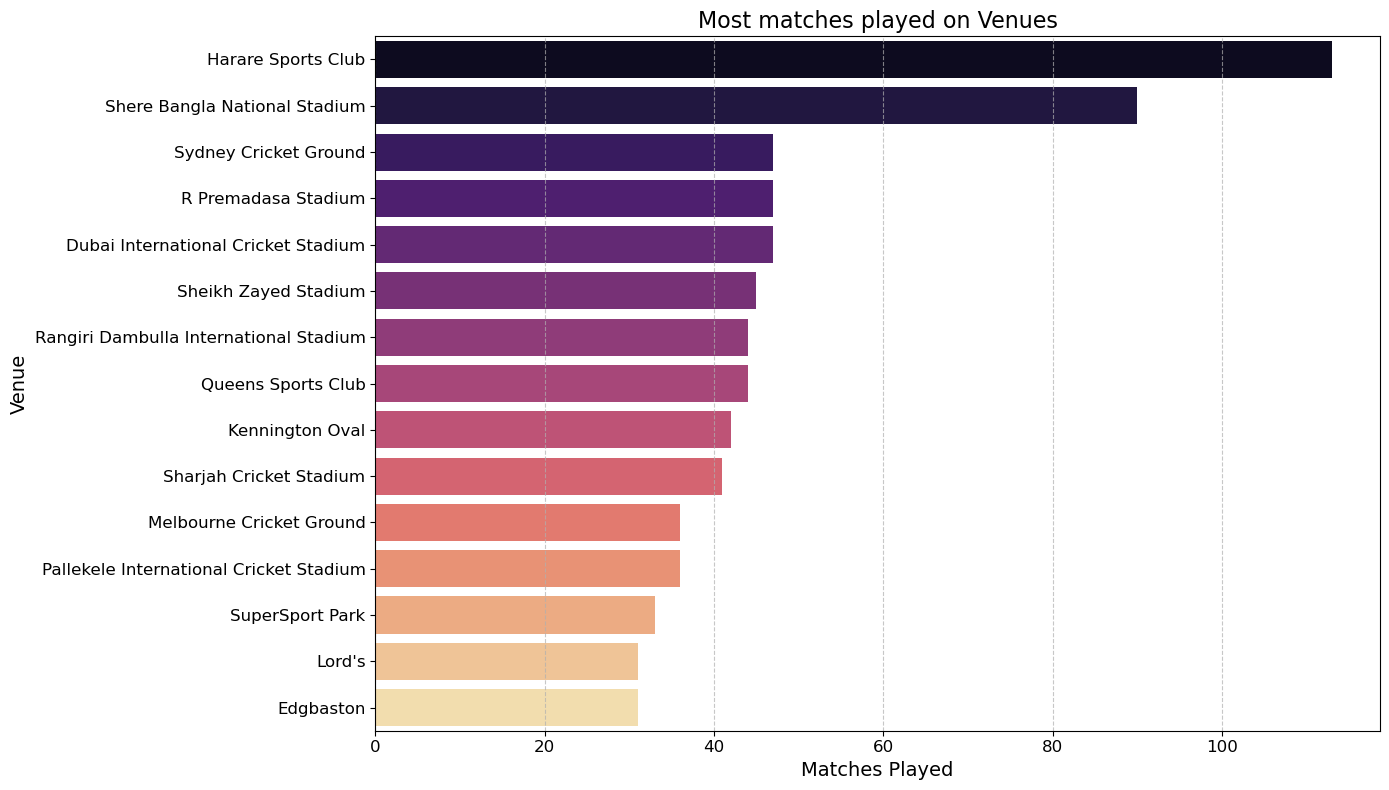

In [81]:
# Create the bar plot with horizontal bars
plt.figure(figsize=(14, 8))
sns.barplot(x=top_venues.values, y=top_venues.index, palette='magma')

# Enhancements
plt.title('Most matches played on Venues', fontsize=16)
plt.xlabel('Matches Played', fontsize=14)
plt.ylabel('Venue', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

## Most player of the match winners

In [83]:
#Most player of the match winners
top_players = odi_match_info['player_of_match'].value_counts().head(15)

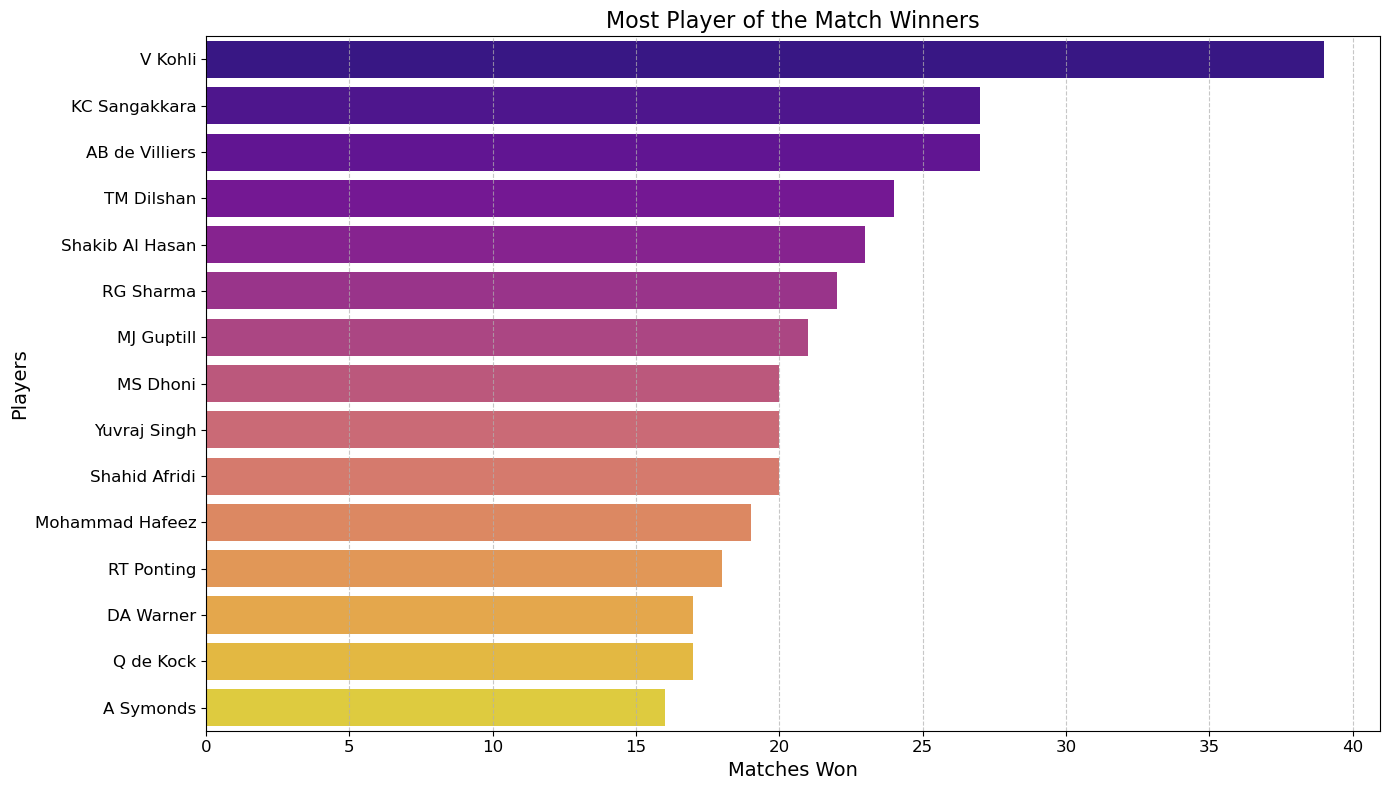

In [86]:
plt.figure(figsize=(14, 8))
sns.barplot(x=top_players.values, y=top_players.index, palette='plasma')

# Enhancements
plt.title('Most Player of the Match Winners', fontsize=16)
plt.xlabel('Matches Won', fontsize=14)
plt.ylabel('Players', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

## Toss Decision

In [87]:
#toss decision 
toss_decision = odi_match_info['toss_decision'].value_counts()

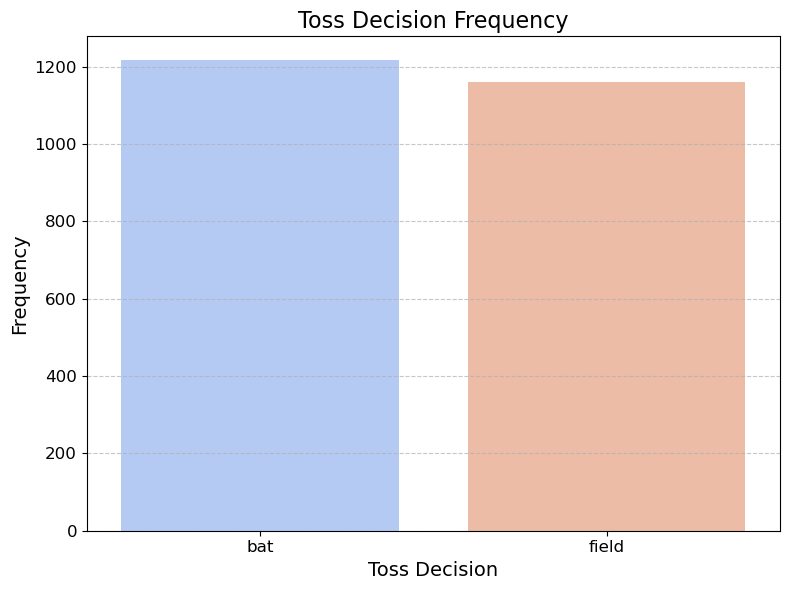

In [90]:
plt.figure(figsize=(8, 6))
sns.barplot(x=toss_decision.index, y=toss_decision.values, palette='coolwarm')

# Enhancements
plt.title('Toss Decision Frequency', fontsize=16)
plt.xlabel('Toss Decision', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

## Top 15 Run Scorers

In [91]:
# This code is used to calculate the total runs scored by each batsman and then identify the top 15 highest run-scorers.
# It groups the data by batsman, sums their runs, sorts the totals in descending order, and selects the top 15, 
# highlighting the most prolific batsmen in the dataset.

batsmen_total_runs = odi_match_data.groupby(['striker'])['runs_off_bat'].sum().sort_values(ascending=False).head(15)

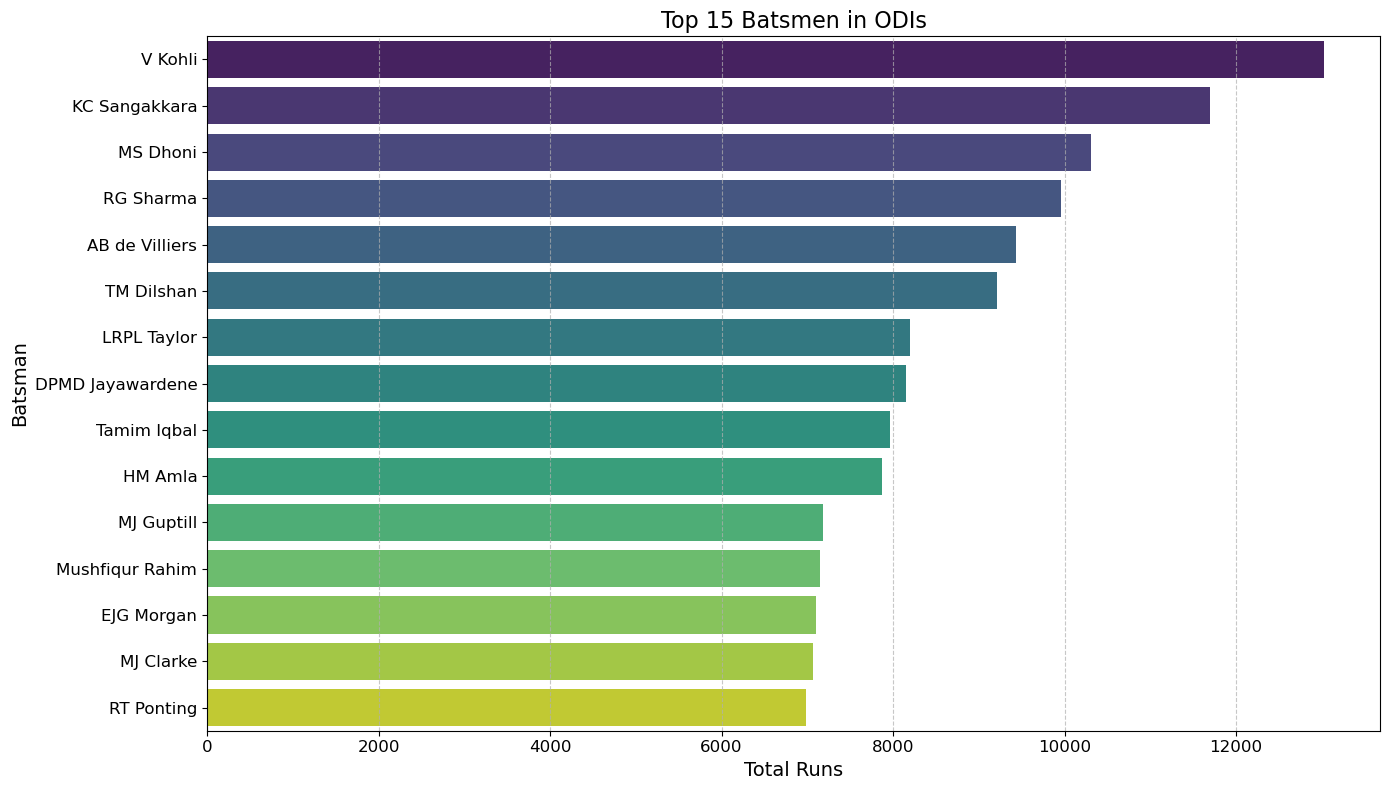

In [93]:
plt.figure(figsize=(14, 8))
sns.barplot(x=batsmen_total_runs.values, y=batsmen_total_runs.index, palette='viridis')

# Enhancements
plt.title('Top 15 Batsmen in ODIs', fontsize=16)
plt.xlabel('Total Runs', fontsize=14)
plt.ylabel('Batsman', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

## Top 15 Wicket Takers in ODIs

In [96]:
# This code is used to identify the top 15 bowlers with the most wickets. It filters the data to include only rows 
# where a wicket was taken, groups the data by bowler, counts the number of wickets each bowler took, 
# sorts these counts in descending order, and selects the top 15 bowlers, 
# highlighting the most successful bowlers in the dataset.

top_bowlers_wickets = odi_match_data[odi_match_data['wicket_type'].notnull()].groupby('bowler')['wicket_type'].count().sort_values(ascending=False).head(15)

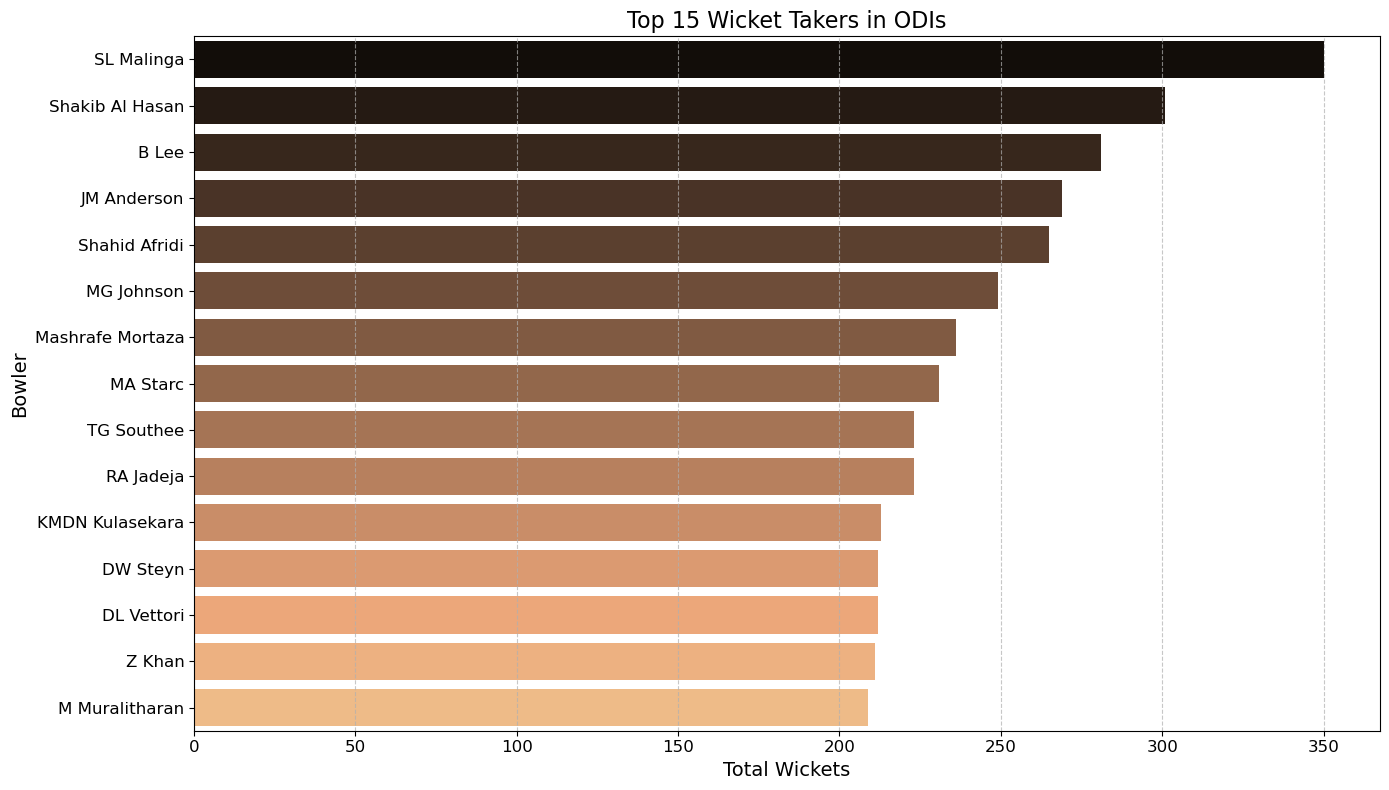

In [100]:
plt.figure(figsize=(14, 8))
sns.barplot(x=top_bowlers_wickets.values, y=top_bowlers_wickets.index, palette='copper')

# Enhancements
plt.title('Top 15 Wicket Takers in ODIs', fontsize=16)
plt.xlabel('Total Wickets', fontsize=14)
plt.ylabel('Bowler', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


## Biggest cricket rivals head-to-head performance

## India v Pakistan head-to-head performance

In [118]:
# Pakistan vs India head-to-head performance
pak_ind_matches = odi_match_info[
    ((odi_match_info['team1'] == 'Pakistan') & (odi_match_info['team2'] == 'India')) | 
    ((odi_match_info['team1'] == 'India') & (odi_match_info['team2'] == 'Pakistan'))
]

# This code is used to filter the dataset to include only the matches played between Pakistan and India. 
# This helps isolate the specific head-to-head matches between these two teams for further analysis.

In [119]:
# Counting wins
pak_wins = pak_ind_matches[pak_ind_matches['winner'] == 'Pakistan'].shape[0]
ind_wins = pak_ind_matches[pak_ind_matches['winner'] == 'India'].shape[0]

# The code is used to count the number of matches won by each team in the head-to-head matches between Pakistan and India.

# • pak_wins counts how many of these matches were won by Pakistan.
# • ind_wins counts how many were won by India.

#This provides a summary of the win-loss record between the two teams.

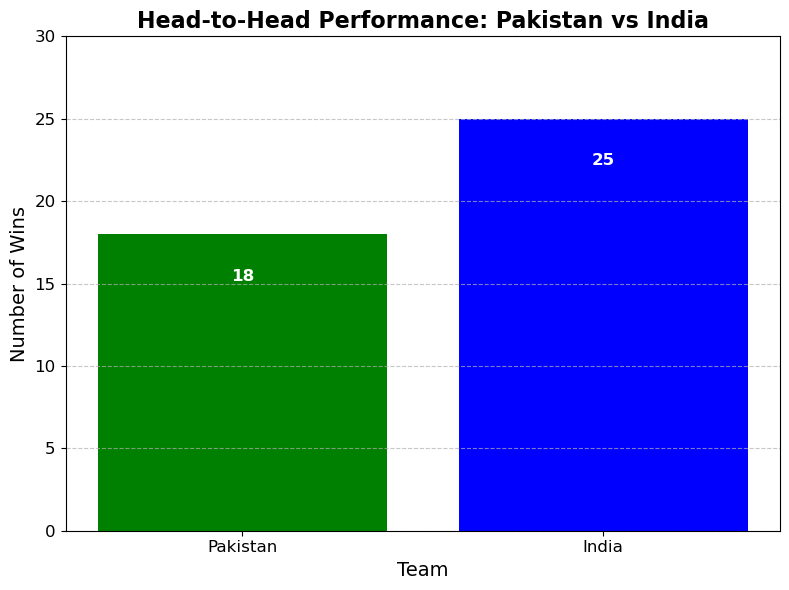

In [131]:
plt.figure(figsize=(8, 6))
bars = plt.bar(['Pakistan', 'India'], [pak_wins, ind_wins], color=['green', 'blue'])

# Enhancements
plt.title('Head-to-Head Performance: Pakistan vs India', fontsize=16, fontweight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of Wins', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(pak_wins, ind_wins) + 5)  # Adding some space above the highest bar
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Adding text labels inside the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 3, f'{int(height)}', 
             ha='center', va='bottom', color='white', fontsize=12, fontweight='bold')

# Display the plot
plt.show()

## England vs Australia head-to-head performance

In [121]:
# The code is used to filter the dataset to include only the matches played between England and Australia. 
# This allows you to isolate and analyze the head-to-head performance between these two teams specifically.

eng_aus_matches = odi_match_info[
    ((odi_match_info['team1'] == 'England') & (odi_match_info['team2'] == 'Australia')) | 
    ((odi_match_info['team1'] == 'Australia') & (odi_match_info['team2'] == 'England'))
]

In [122]:
# Counting wins
eng_wins = eng_aus_matches[eng_aus_matches['winner'] == 'England'].shape[0]
aus_wins = eng_aus_matches[eng_aus_matches['winner'] == 'Australia'].shape[0]

# This code used to count the number of matches won by each team in the head-to-head matches between England and Australia:

# • eng_wins counts how many of these matches were won by England.
# • aus_wins counts how many were won by Australia.

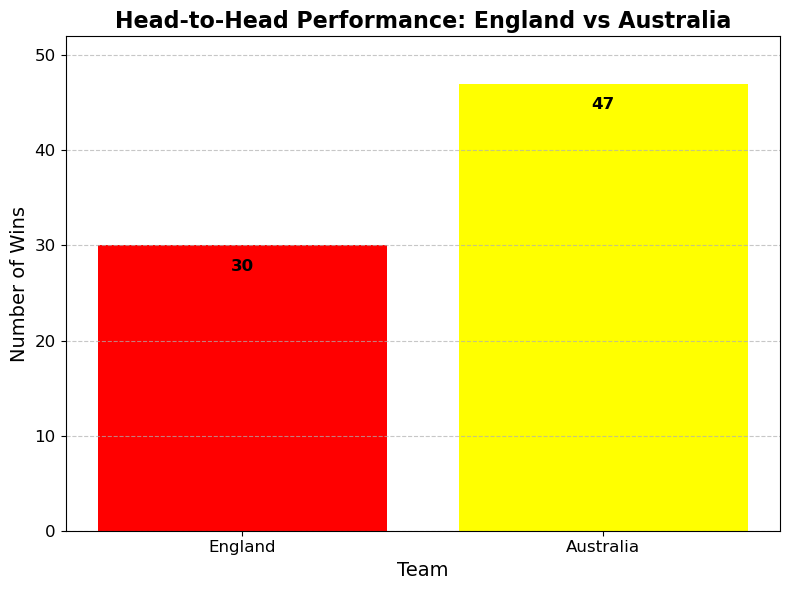

In [132]:
import matplotlib.pyplot as plt

# Plotting the results
plt.figure(figsize=(8, 6))
bars = plt.bar(['England', 'Australia'], [eng_wins, aus_wins], color=['red', 'yellow'])

# Enhancements
plt.title('Head-to-Head Performance: England vs Australia', fontsize=16, fontweight='bold')
plt.xlabel('Team', fontsize=14)
plt.ylabel('Number of Wins', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(eng_wins, aus_wins) + 5)  # Adding some space above the highest bar
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Adding text labels inside the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height - 3, f'{int(height)}', 
             ha='center', va='bottom', color='black', fontsize=12, fontweight='bold')

# Display the plot
plt.show()


## Win percentage by toss

In [ ]:
# Filter data for matches from 2002 to 2023
filtered_data = odi_match_info[(odi_match_info['season'] >= '2002') & (odi_match_info['season'] <= '2023')]

# This code is used to filter the dataset odi_match_info to include only the matches played between the years 2002 and 2023. Here's a breakdown of the functions used:

# • odi_match_info[...]: Applies a filter to the DataFrame based on the specified conditions.
# • (odi_match_info['season'] >= '2002'): Checks if the season is greater than or equal to 2002.
# &: Combines two conditions, ensuring both must be true (logical AND).
# • (odi_match_info['season'] <= '2023'): Checks if the season is less than or equal to 2023.

# The result is a new DataFrame filtered_data containing only the rows (matches) from the years 2002 to 2023.

In [140]:
# Calculate win percentages for each toss decision year by year
win_percentage_by_year = []

In [141]:
for year in filtered_data['season'].unique():
    yearly_data = filtered_data[filtered_data['season'] == year]
    total_matches = len(yearly_data)
    
    bat_wins = ((yearly_data['toss_decision'] == 'bat') & (yearly_data['winner'] == yearly_data['team1'])).sum()
    field_wins = ((yearly_data['toss_decision'] == 'field') & (yearly_data['winner'] == yearly_data['team2'])).sum()
    
    bat_win_percentage = (bat_wins / total_matches) * 100
    field_win_percentage = (field_wins / total_matches) * 100
    
    win_percentage_by_year.append({
        'year': year,
        'bat_win_percentage': bat_win_percentage,
        'field_win_percentage': field_win_percentage
    })

In [144]:
# Convert to DataFrame
win_percentage_df = pd.DataFrame(win_percentage_by_year)

# This code is used to convert the list of dictionaries win_percentage_by_year into a Pandas DataFrame. 
# This makes it easier to analyze, manipulate, and visualize the data, as DataFrames provide powerful tools 
# for handling structured data in Python.


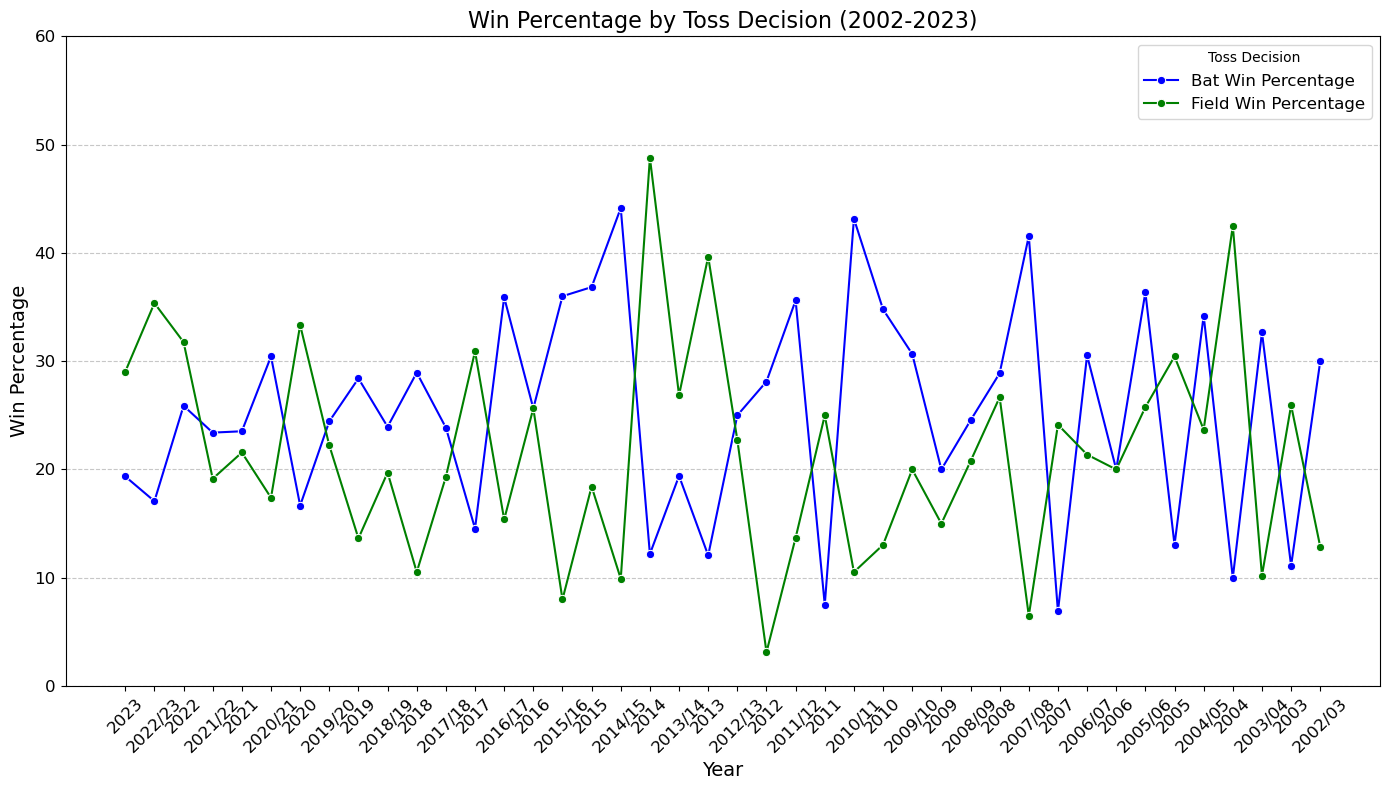

In [146]:
# Plotting the results
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='bat_win_percentage', data=win_percentage_df, marker='o', label='Bat Win Percentage', color='blue')
sns.lineplot(x='year', y='field_win_percentage', data=win_percentage_df, marker='o', label='Field Win Percentage', color='green')

# Enhancements
plt.title('Win Percentage by Toss Decision (2002-2023)', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Win Percentage', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylim(0, 60)  # Set limit from 0 to 60 for percentage
plt.legend(title='Toss Decision', fontsize=12)
plt.tight_layout()

plt.show()

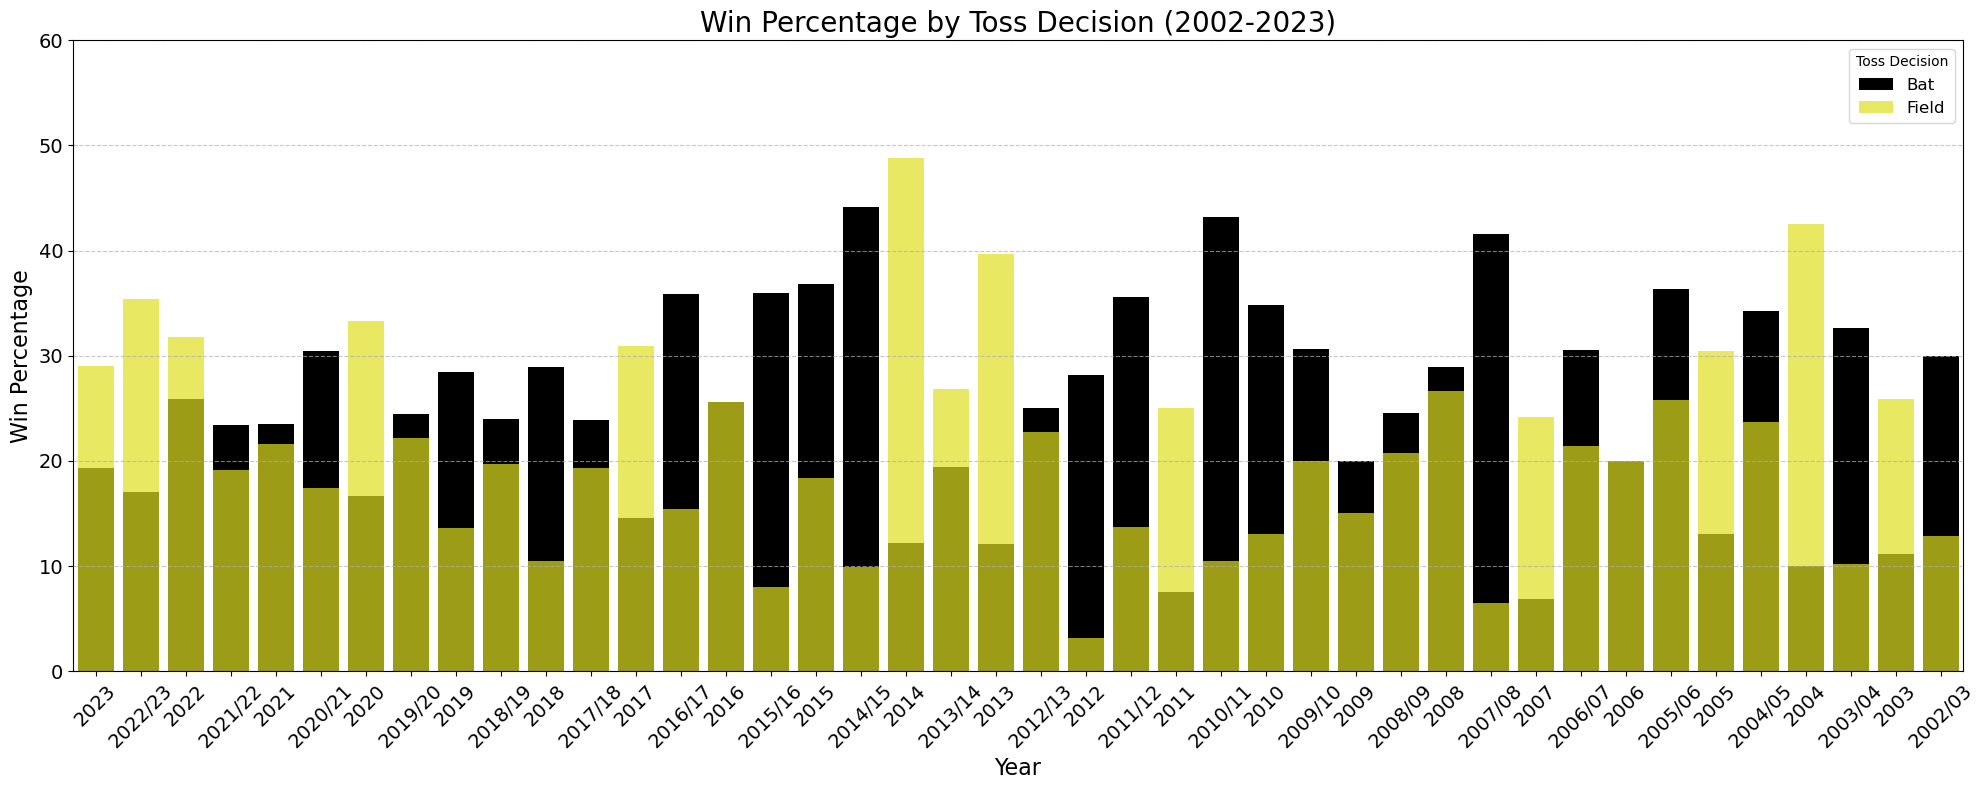

In [167]:
# Plotting the results for each year
plt.figure(figsize=(20, 8))  # Increased figure width for better spacing on the x-axis
sns.barplot(x='year', y='bat_win_percentage', data=win_percentage_df, color='black', label='Bat')
sns.barplot(x='year', y='field_win_percentage', data=win_percentage_df, color='yellow', label='Field', alpha=0.7)

# Enhancements
plt.title('Win Percentage by Toss Decision (2002-2023)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Win Percentage', fontsize=16)
plt.ylim(0, 60)  # Set y-axis limit to 0-60
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Toss Decision', fontsize=12)
plt.tight_layout()

plt.show()

## Most Numbers of Wins by toss

In [161]:
# Filter data for matches from 2002 to 2023
filtered_data = odi_match_info[(odi_match_info['season'] >= '2002') & (odi_match_info['season'] <= '2023')]

In [285]:
# The code is used to create a subset of the odi_match_info DataFrame that includes only the matches played between 
# the years 2002 and 2023. Here's a breakdown of the key elements:

# • odi_match_info[...]: Applies a filter to the odi_match_info DataFrame, returning only the rows that meet the specified conditions.
# • (odi_match_info['season'] >= '2002'): Filters the DataFrame to include only rows where the season is 2002 or later.
# • &: Combines the two conditions, ensuring that both must be true (logical AND).
# • (odi_match_info['season'] <= '2023'): Filters the DataFrame to include only rows where the season is 2023 or earlier.

In [162]:
# Calculate the number of wins by bat first and field first per year
wins_by_year = []

In [163]:
for year in filtered_data['season'].unique():
    yearly_data = filtered_data[filtered_data['season'] == year]
    
    # Counting wins where team that won batted first or fielded first
    bat_first_wins = ((yearly_data['toss_decision'] == 'bat') & (yearly_data['winner'] == yearly_data['team1'])).sum()
    field_first_wins = ((yearly_data['toss_decision'] == 'field') & (yearly_data['winner'] == yearly_data['team2'])).sum()
    
    wins_by_year.append({
        'year': year,
        'bat_first_wins': bat_first_wins,
        'field_first_wins': field_first_wins
    })

In [164]:
# Convert to DataFrame
wins_df = pd.DataFrame(wins_by_year)

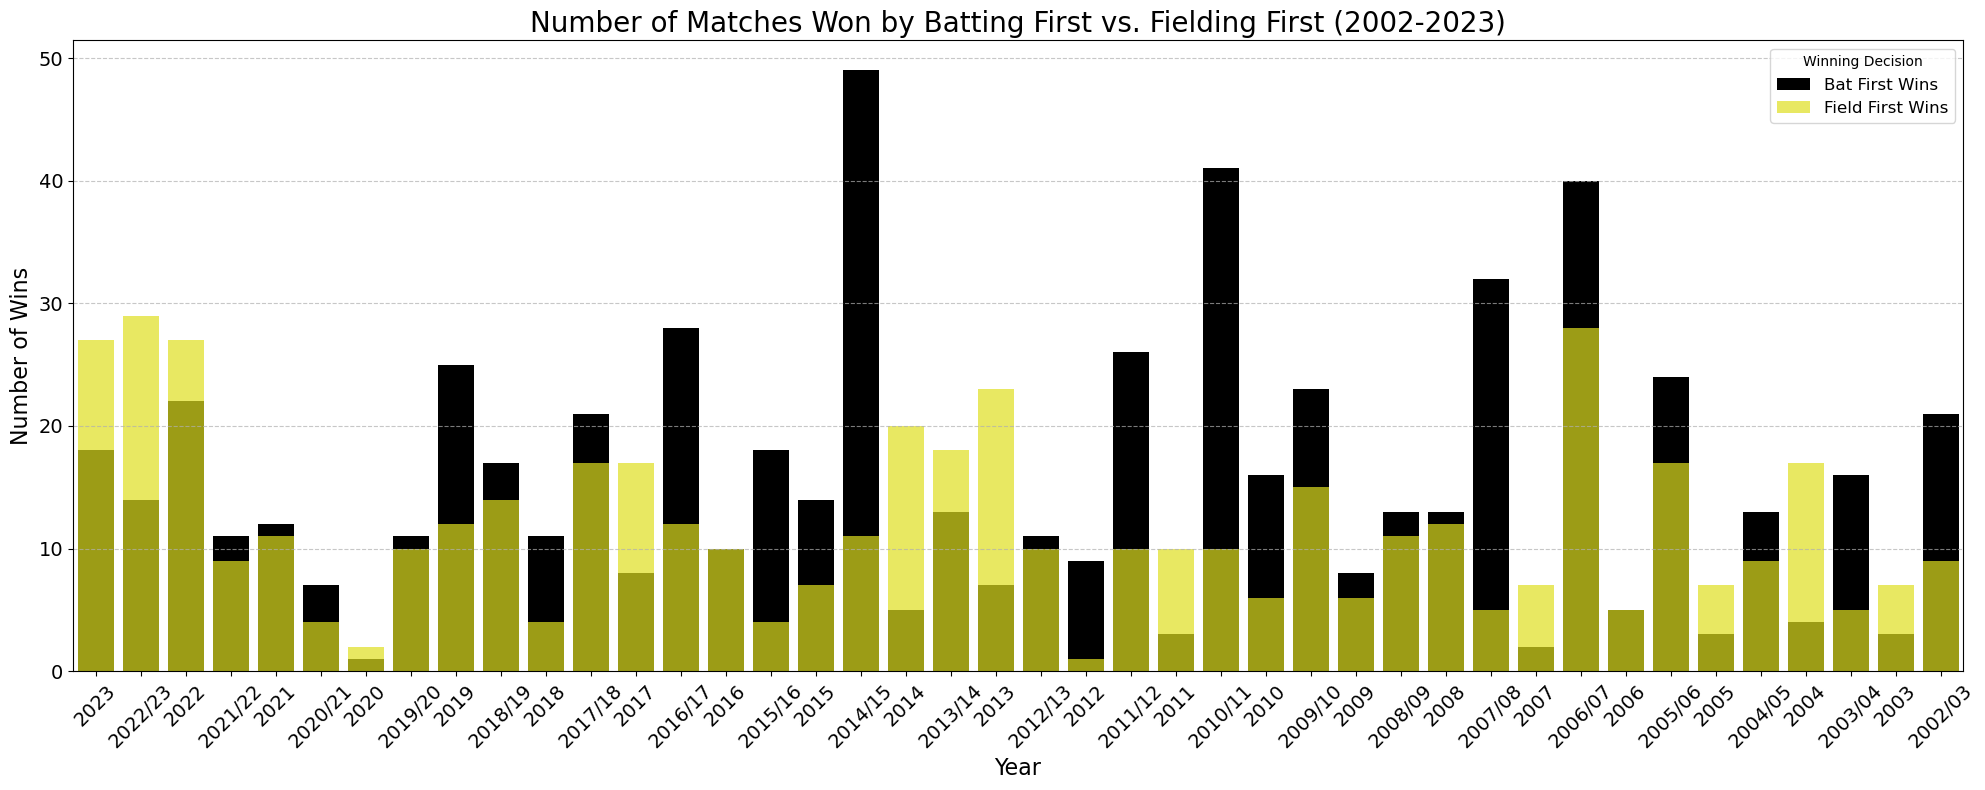

In [166]:
# Plotting the results for each year
plt.figure(figsize=(20, 8))  # Adjusting figure size for better spacing on the x-axis
sns.barplot(x='year', y='bat_first_wins', data=wins_df, color='black', label='Bat First Wins')
sns.barplot(x='year', y='field_first_wins', data=wins_df, color='yellow', label='Field First Wins', alpha=0.7)

# Enhancements
plt.title('Number of Matches Won by Batting First vs. Fielding First (2002-2023)', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number of Wins', fontsize=16)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Winning Decision', fontsize=12)
plt.tight_layout()

plt.show()

## Top Run Scorer batsman by Year (2003-2023)

In [223]:
# Convert the 'start_date' column to datetime
odi_match_data['start_date'] = pd.to_datetime(odi_match_data['start_date'], errors='coerce')

In [299]:
# The above code converts the 'start_date' column in the odi_match_data DataFrame to a datetime format 
# using the pd.to_datetime() function. Here's why this is important:

# • pd.to_datetime(): Converts the data in the 'start_date' column from strings (or other formats) into Python's datetime objects, making it easier to perform date-based operations and analysis.
# • errors='coerce': Ensures that any invalid or unparseable date entries are converted to NaT (Not a Time), rather than causing an error. This helps prevent issues when the data contains invalid dates.

In [224]:
# Extract the year
odi_match_data['Year'] = odi_match_data['start_date'].dt.year

In [225]:
# Aggregate runs by year and batsman (striker)
yearly_runs = odi_match_data.groupby(['Year', 'striker'])['runs_off_bat'].sum().reset_index()

In [298]:
# The above code aggregates the total runs scored by each batsman (striker) for each year. 
# Here's a breakdown of the key functions used:

# • odi_match_data.groupby(['Year', 'striker']): Groups the data by both Year and striker, so that the operations that follow will be applied within each year for each batsman.
# • ['runs_off_bat'].sum(): Sums the runs_off_bat (runs scored by the batsman) within each group (i.e., for each batsman in each year).
# • .reset_index(): Converts the grouped data back into a DataFrame, with the grouped columns (Year and striker) turned into regular columns instead of being the index.

In [226]:
# Identify the top scorer for each year
top_scorers_each_year = yearly_runs.loc[yearly_runs.groupby('Year')['runs_off_bat'].idxmax()]

In [301]:
# The above code identifies the top run-scorer (the batsman who scored the most runs) for each year. Here's a breakdown of how it works:

# • yearly_runs.groupby('Year')['runs_off_bat'].idxmax():

   # •This groups the yearly_runs DataFrame by Year.
   # • For each year, it finds the index (idxmax()) of the row where the runs_off_bat is the highest. This effectively identifies the top scorer for each year.

# • yearly_runs.loc[...]:

  #  • Using .loc[], the code selects the rows from yearly_runs corresponding to these indices.
  #  • The result is a DataFrame containing the top scorer (batsman with the most runs) for each year.

In [237]:
# Filter the data for years 2003 to 2023
top_scorers_each_year = top_scorers_each_year[top_scorers_each_year['Year'].between(2003, 2023)]

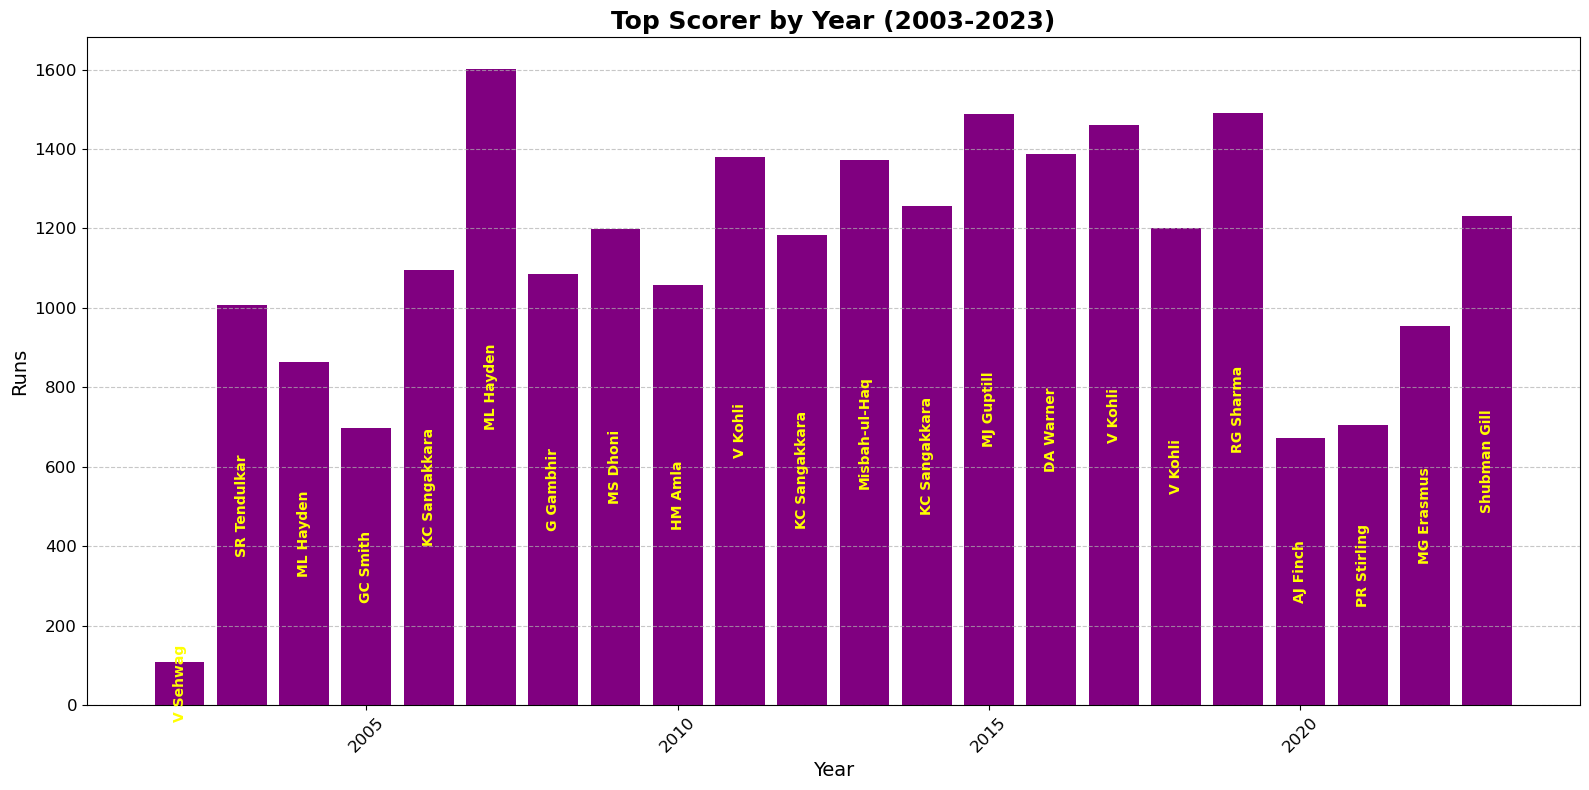

In [270]:
# Plotting the bar graph
plt.figure(figsize=(16, 8))  # Slightly increased figure size for better spacing
plt.bar(top_scorers_each_year['Year'], top_scorers_each_year['runs_off_bat'], color='purple')

# Adding text labels inside each bar
for i in range(len(top_scorers_each_year)):
    plt.text(top_scorers_each_year['Year'].iloc[i], 
             top_scorers_each_year['runs_off_bat'].iloc[i] / 2,  # Position the text in the middle of the bar
             top_scorers_each_year['striker'].iloc[i], 
             ha='center', va='center', rotation=90, fontsize=10, color='yellow', fontweight='bold')  # Centered vertically and horizontally

# Enhancements
plt.xlabel('Year', fontsize=14)
plt.ylabel('Runs', fontsize=14)
plt.title('Top Scorer by Year (2003-2023)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Top Wicket Taker Bowler by Year (2003-2023)

In [ ]:
# Convert the 'start_date' column to datetime already done above

# Extract the year already done above

In [247]:
# Filter the data to only include instances where a wicket was taken
wicket_data = odi_match_data[odi_match_data['wicket_type'].notnull()]

In [248]:
# Aggregate wickets by year and bowler
yearly_wickets = wicket_data.groupby(['Year', 'bowler'])['wicket_type'].count().reset_index()

In [249]:
# Identify the top wicket-taker for each year
top_wicket_takers_each_year = yearly_wickets.loc[yearly_wickets.groupby('Year')['wicket_type'].idxmax()]

In [250]:
# Filter the data for years 2002 to 2023
top_wicket_takers_each_year = top_wicket_takers_each_year[top_wicket_takers_each_year['Year'].between(2002, 2023)]

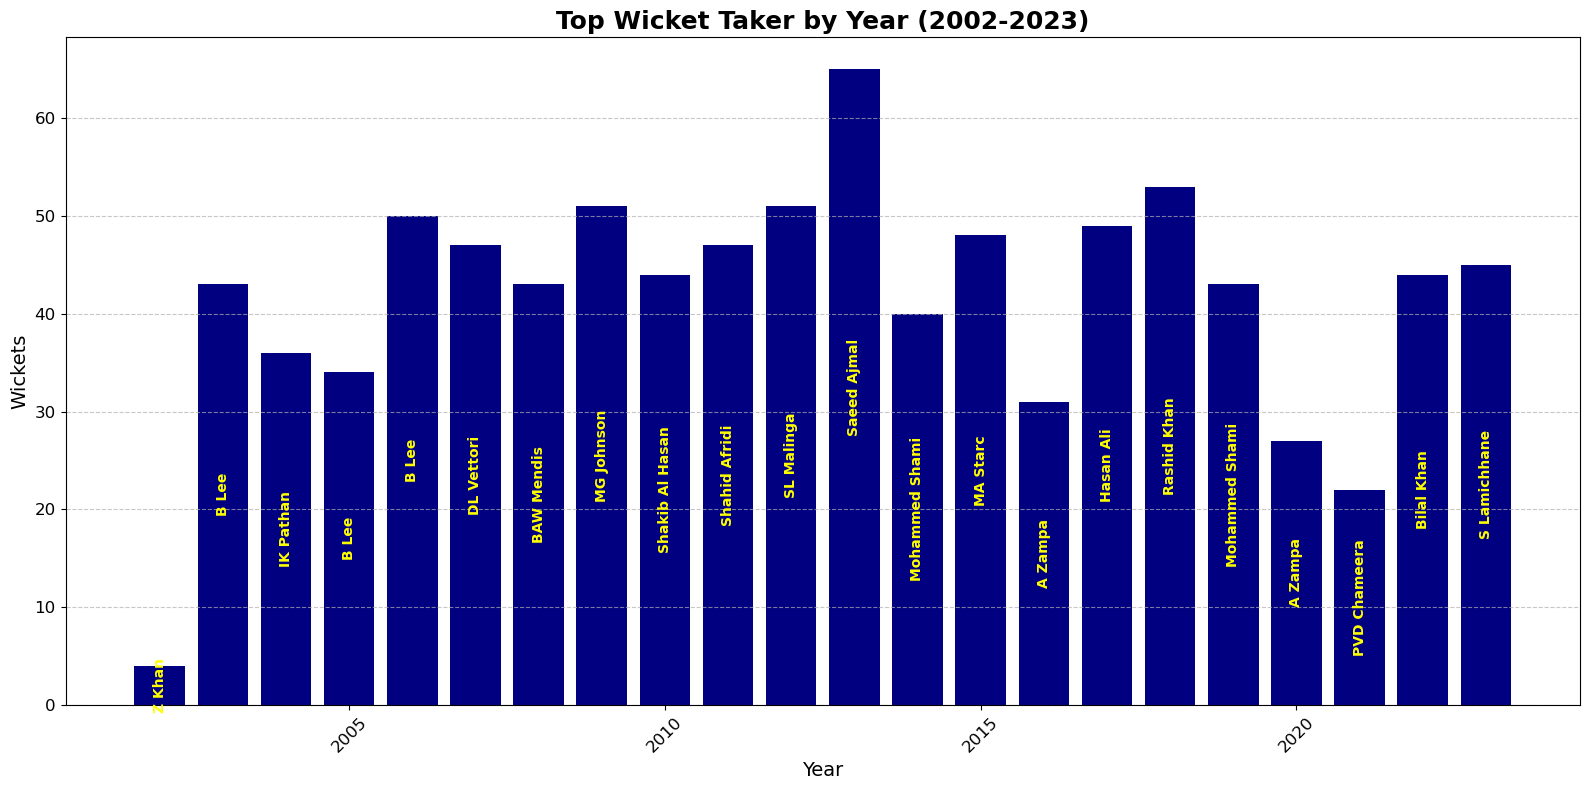

In [300]:
# Plot the results
plt.figure(figsize=(16, 8))  # Adjusting figure size for better spacing
plt.bar(top_wicket_takers_each_year['Year'], top_wicket_takers_each_year['wicket_type'], color='navy')

# Adding text labels inside each bar
for i in range(len(top_wicket_takers_each_year)):
    plt.text(top_wicket_takers_each_year['Year'].iloc[i], 
             top_wicket_takers_each_year['wicket_type'].iloc[i] / 2,  # Position the text in the middle of the bar
             top_wicket_takers_each_year['bowler'].iloc[i], 
             ha='center', va='center', rotation=90, fontsize=10, color='yellow', fontweight='bold')  # Centered vertically and horizontally

# Enhancements
plt.xlabel('Year', fontsize=14)
plt.ylabel('Wickets', fontsize=14)
plt.title('Top Wicket Taker by Year (2002-2023)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Most Runs and Wickets by Players from Top 6 Cricket Playing Nations

## 1. Pakistan

## Most Runs by Pakistani Batsman (2002-2023)

In [291]:
# Convert the 'start_date' column to datetime already done above

# Extract the year already done above

In [286]:
# Filter the data to include only Pakistani batsmen (assuming 'batting_team' column exists)
pakistani_batsmen_data = odi_match_data[odi_match_data['batting_team'] == 'Pakistan']

In [287]:
# Aggregate runs by year and batsman (striker)
yearly_runs_pakistani = pakistani_batsmen_data.groupby(['Year', 'striker'])['runs_off_bat'].sum().reset_index()

In [288]:
# Identify the top scorer for each year
top_scorers_pakistani_each_year = yearly_runs_pakistani.loc[yearly_runs_pakistani.groupby('Year')['runs_off_bat'].idxmax()]

In [289]:
# Filter the data for years 2002 to 2023
top_scorers_pakistani_each_year = top_scorers_pakistani_each_year[top_scorers_pakistani_each_year['Year'].between(2002, 2023)]

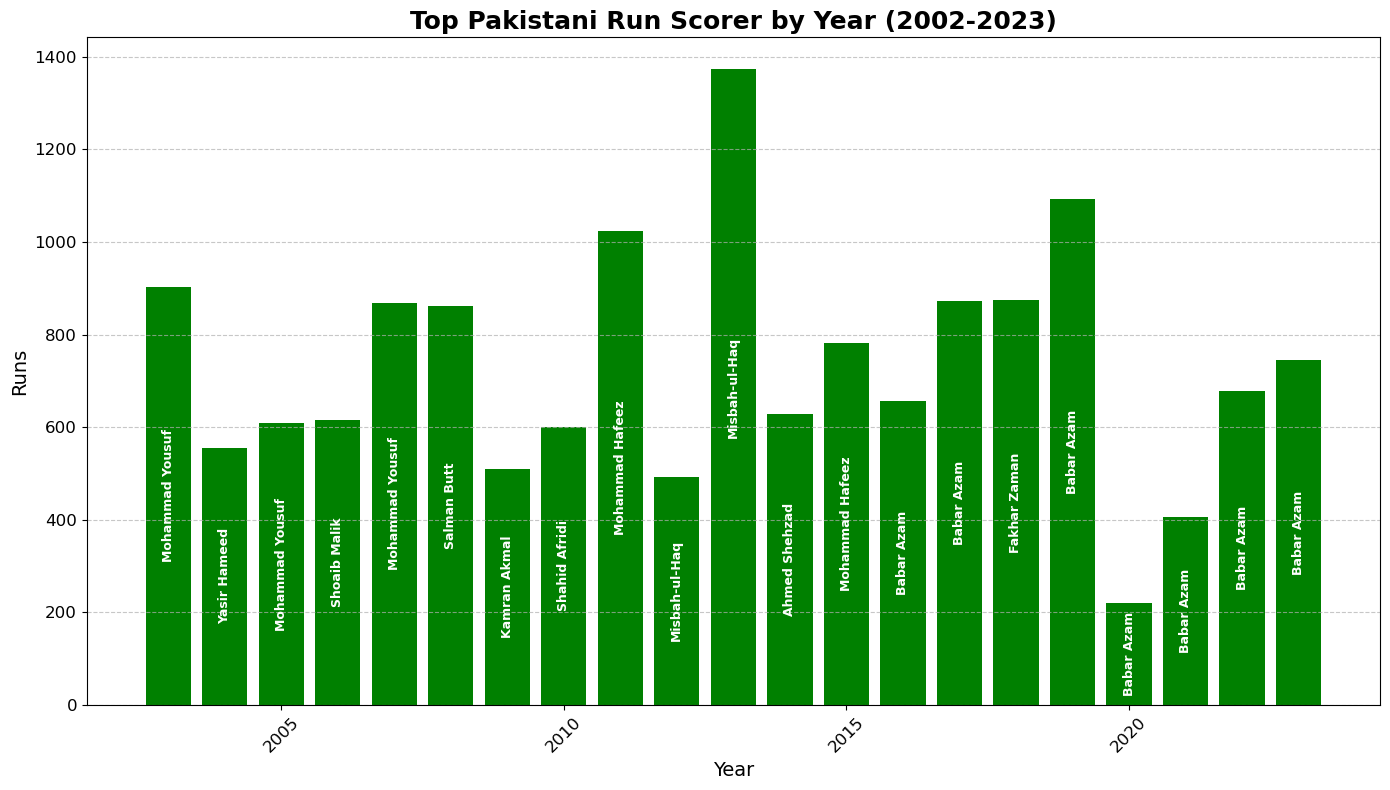

In [338]:
# Plot the results
plt.figure(figsize=(14, 8))
plt.bar(top_scorers_pakistani_each_year['Year'], top_scorers_pakistani_each_year['runs_off_bat'], color='green')

# Adding text labels inside each bar
for i in range(len(top_scorers_pakistani_each_year)):
    plt.text(top_scorers_pakistani_each_year['Year'].iloc[i], 
             top_scorers_pakistani_each_year['runs_off_bat'].iloc[i] / 2,  # Position the text in the middle of the bar
             top_scorers_pakistani_each_year['striker'].iloc[i], 
             ha='center', va='center', rotation=90, fontsize=9, color='white', fontweight='bold')  # Centered vertically and horizontally

# Enhancements
plt.xlabel('Year', fontsize=14)
plt.ylabel('Runs', fontsize=14)
plt.title('Top Pakistani Run Scorer by Year (2002-2023)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Most Wickets by Pakistani Bowler (2002-2023)

In [302]:
# Convert the 'start_date' column to datetime already done above

# Extract the year already done above

In [292]:
# Filter the data to include only Pakistani bowlers (assuming 'bowling_team' column exists)
pakistani_bowlers_data = odi_match_data[odi_match_data['bowling_team'] == 'Pakistan']

In [293]:
# Filter the data to include only instances where a wicket was taken
wicket_data_pakistani = pakistani_bowlers_data[pakistani_bowlers_data['wicket_type'].notnull()]

In [294]:
# Aggregate wickets by year and bowler
yearly_wickets_pakistani = wicket_data_pakistani.groupby(['Year', 'bowler'])['wicket_type'].count().reset_index()

In [295]:
# Identify the top wicket-taker for each year
top_wicket_takers_pakistani_each_year = yearly_wickets_pakistani.loc[yearly_wickets_pakistani.groupby('Year')['wicket_type'].idxmax()]

In [296]:
# Filter the data for years 2002 to 2023
top_wicket_takers_pakistani_each_year = top_wicket_takers_pakistani_each_year[top_wicket_takers_pakistani_each_year['Year'].between(2002, 2023)]

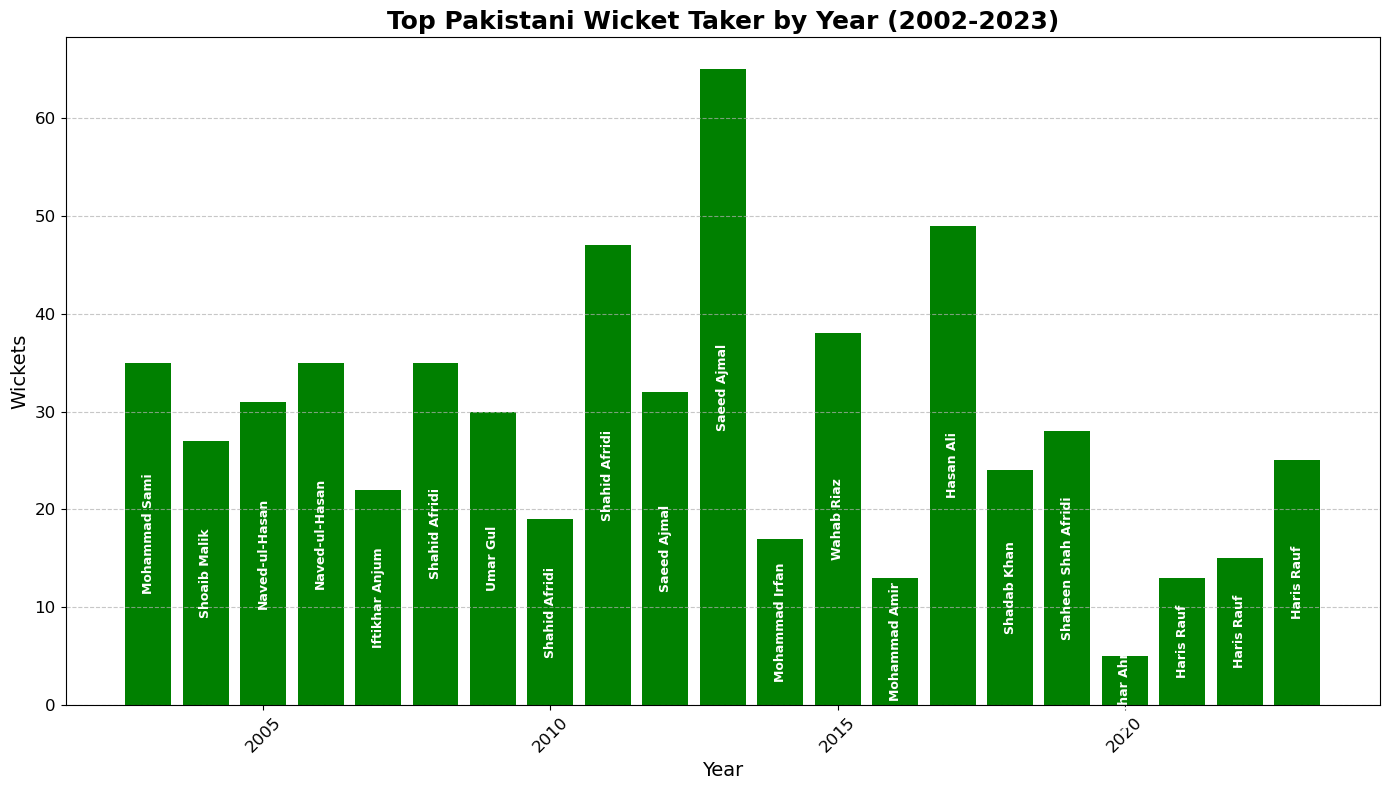

In [339]:
# Plot the results
plt.figure(figsize=(14, 8))
plt.bar(top_wicket_takers_pakistani_each_year['Year'], top_wicket_takers_pakistani_each_year['wicket_type'], color='green')

# Adding text labels inside each bar
for i in range(len(top_wicket_takers_pakistani_each_year)):
    plt.text(top_wicket_takers_pakistani_each_year['Year'].iloc[i], 
             top_wicket_takers_pakistani_each_year['wicket_type'].iloc[i] / 2,  # Position the text in the middle of the bar
             top_wicket_takers_pakistani_each_year['bowler'].iloc[i], 
             ha='center', va='center', rotation=90, fontsize=9, color='white', fontweight='bold')  # Centered vertically and horizontally

# Enhancements
plt.xlabel('Year', fontsize=14)
plt.ylabel('Wickets', fontsize=14)
plt.title('Top Pakistani Wicket Taker by Year (2002-2023)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## 2. India

## Most Runs by Indian Batsman (2002-2023)

In [2]:
# Convert the 'start_date' column to datetime already done in Top Run Scorer Batsman

# Extract the year already done in Top Run Scorer Batsman

In [303]:
# Filter the data to include only Indian batsmen (assuming 'batting_team' column exists)
indian_batsmen_data = odi_match_data[odi_match_data['batting_team'] == 'India']

In [304]:
# Aggregate runs by year and batsman (striker)
yearly_runs_indian = indian_batsmen_data.groupby(['Year', 'striker'])['runs_off_bat'].sum().reset_index()

In [305]:
# Identify the top scorer for each year
top_scorers_indian_each_year = yearly_runs_indian.loc[yearly_runs_indian.groupby('Year')['runs_off_bat'].idxmax()]

In [306]:
# Filter the data for years 2002 to 2023
top_scorers_indian_each_year = top_scorers_indian_each_year[top_scorers_indian_each_year['Year'].between(2002, 2023)]

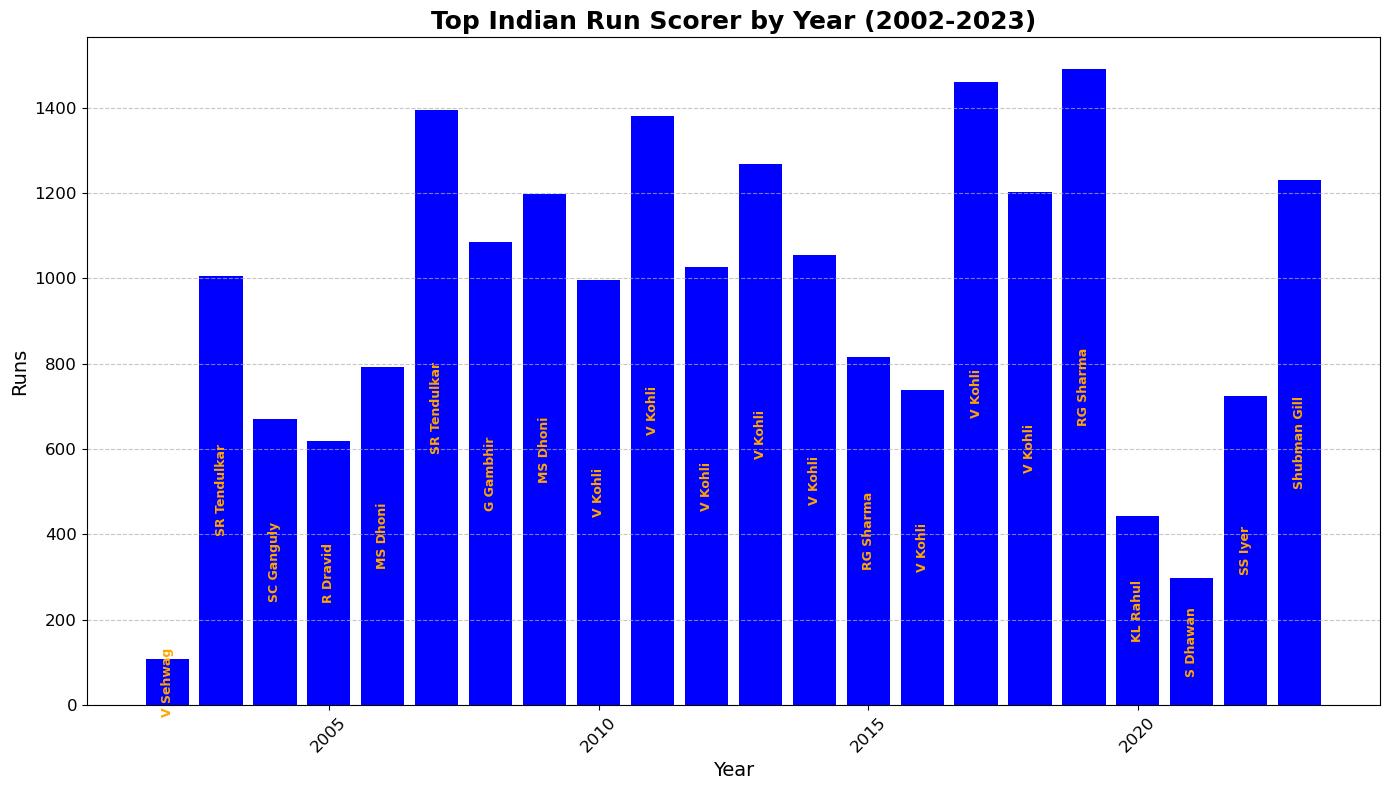

In [341]:
# Plot the results
plt.figure(figsize=(14, 8))
plt.bar(top_scorers_indian_each_year['Year'], top_scorers_indian_each_year['runs_off_bat'], color='blue')

# Adding text labels inside each bar
for i in range(len(top_scorers_indian_each_year)):
    plt.text(top_scorers_indian_each_year['Year'].iloc[i], 
             top_scorers_indian_each_year['runs_off_bat'].iloc[i] / 2,  # Position the text in the middle of the bar
             top_scorers_indian_each_year['striker'].iloc[i], 
             ha='center', va='center', rotation=90, fontsize=9, color='orange', fontweight='bold')  # Centered vertically and horizontally

# Enhancements
plt.xlabel('Year', fontsize=14)
plt.ylabel('Runs', fontsize=14)
plt.title('Top Indian Run Scorer by Year (2002-2023)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


## Most Wickets by Indian Bowler (2002-2023)

In [3]:
# Convert the 'start_date' column to datetime already done in Top Run Scorer Batsman

# Extract the year already done in Top Run Scorer Batsman

In [308]:
# Filter the data to include only Indian bowlers (assuming 'bowling_team' column exists)
indian_bowlers_data = odi_match_data[odi_match_data['bowling_team'] == 'India']

In [309]:
# Filter the data to include only instances where a wicket was taken
wicket_data_indian = indian_bowlers_data[indian_bowlers_data['wicket_type'].notnull()]

In [310]:
# Aggregate wickets by year and bowler
yearly_wickets_indian = wicket_data_indian.groupby(['Year', 'bowler'])['wicket_type'].count().reset_index()

In [311]:
# Identify the top wicket-taker for each year
top_wicket_takers_indian_each_year = yearly_wickets_indian.loc[yearly_wickets_indian.groupby('Year')['wicket_type'].idxmax()]

In [312]:
# Filter the data for years 2002 to 2023
top_wicket_takers_indian_each_year = top_wicket_takers_indian_each_year[top_wicket_takers_indian_each_year['Year'].between(2002, 2023)]

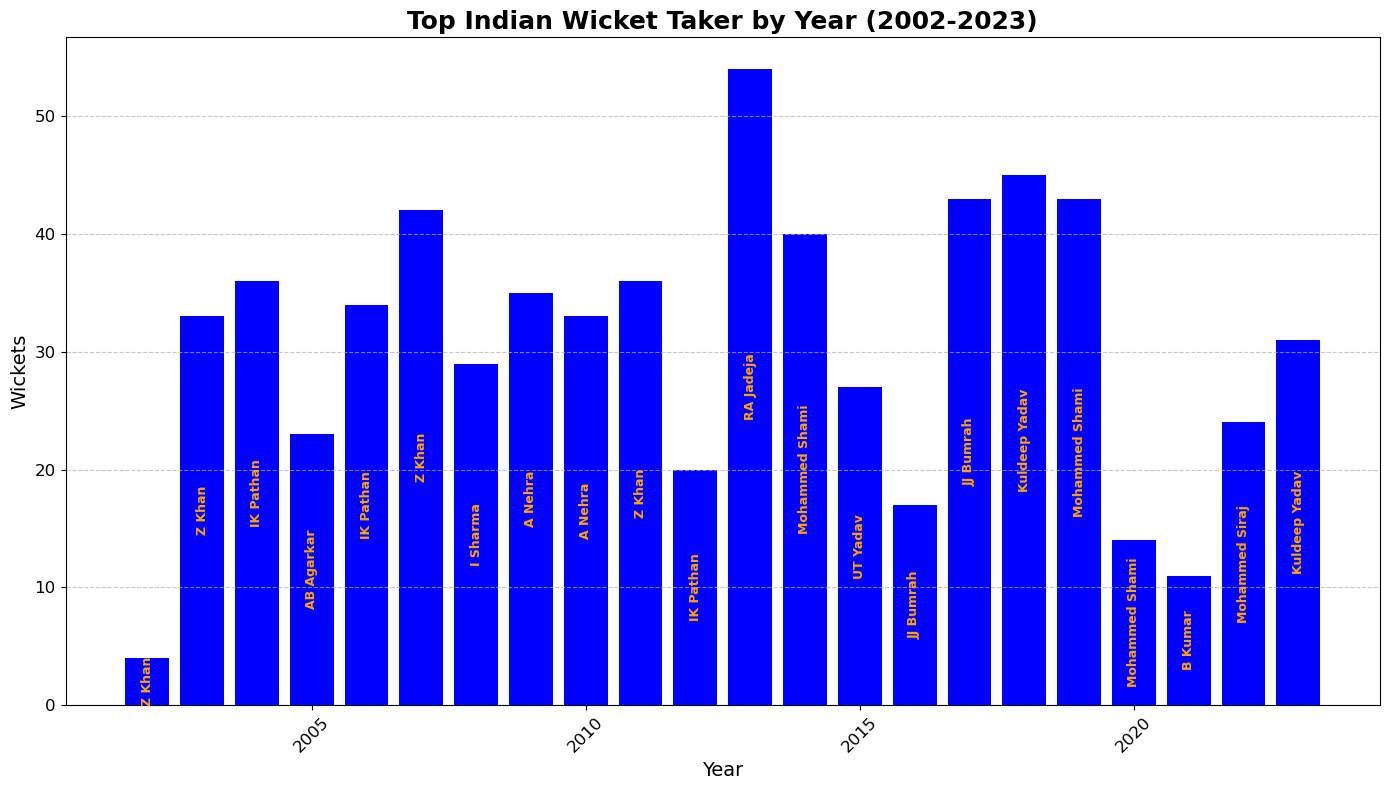

In [342]:
# Plot the results
plt.figure(figsize=(14, 8))
plt.bar(top_wicket_takers_indian_each_year['Year'], top_wicket_takers_indian_each_year['wicket_type'], color='blue')

# Adding text labels inside each bar
for i in range(len(top_wicket_takers_indian_each_year)):
    plt.text(top_wicket_takers_indian_each_year['Year'].iloc[i], 
             top_wicket_takers_indian_each_year['wicket_type'].iloc[i] / 2,  # Position the text in the middle of the bar
             top_wicket_takers_indian_each_year['bowler'].iloc[i], 
             ha='center', va='center', rotation=90, fontsize=9, color='orange', fontweight='bold')  # Centered vertically and horizontally

# Enhancements
plt.xlabel('Year', fontsize=14)
plt.ylabel('Wickets', fontsize=14)
plt.title('Top Indian Wicket Taker by Year (2002-2023)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## 3. Australia

## Most Runs by Australian Batsman (2002-2023)

In [4]:
# Convert the 'start_date' column to datetime already done in Top Run Scorer Batsman

# Extract the year already done in Top Run Scorer Batsman

In [314]:
# Filter the data to include only Australian batsmen (assuming 'batting_team' column exists)
australian_batsmen_data = odi_match_data[odi_match_data['batting_team'] == 'Australia']

In [315]:
# Aggregate runs by year and batsman (striker)
yearly_runs_australian = australian_batsmen_data.groupby(['Year', 'striker'])['runs_off_bat'].sum().reset_index()

In [316]:
# Identify the top scorer for each year
top_scorers_australian_each_year = yearly_runs_australian.loc[yearly_runs_australian.groupby('Year')['runs_off_bat'].idxmax()]

In [317]:
# Filter the data for years 2002 to 2023
top_scorers_australian_each_year = top_scorers_australian_each_year[top_scorers_australian_each_year['Year'].between(2002, 2023)]

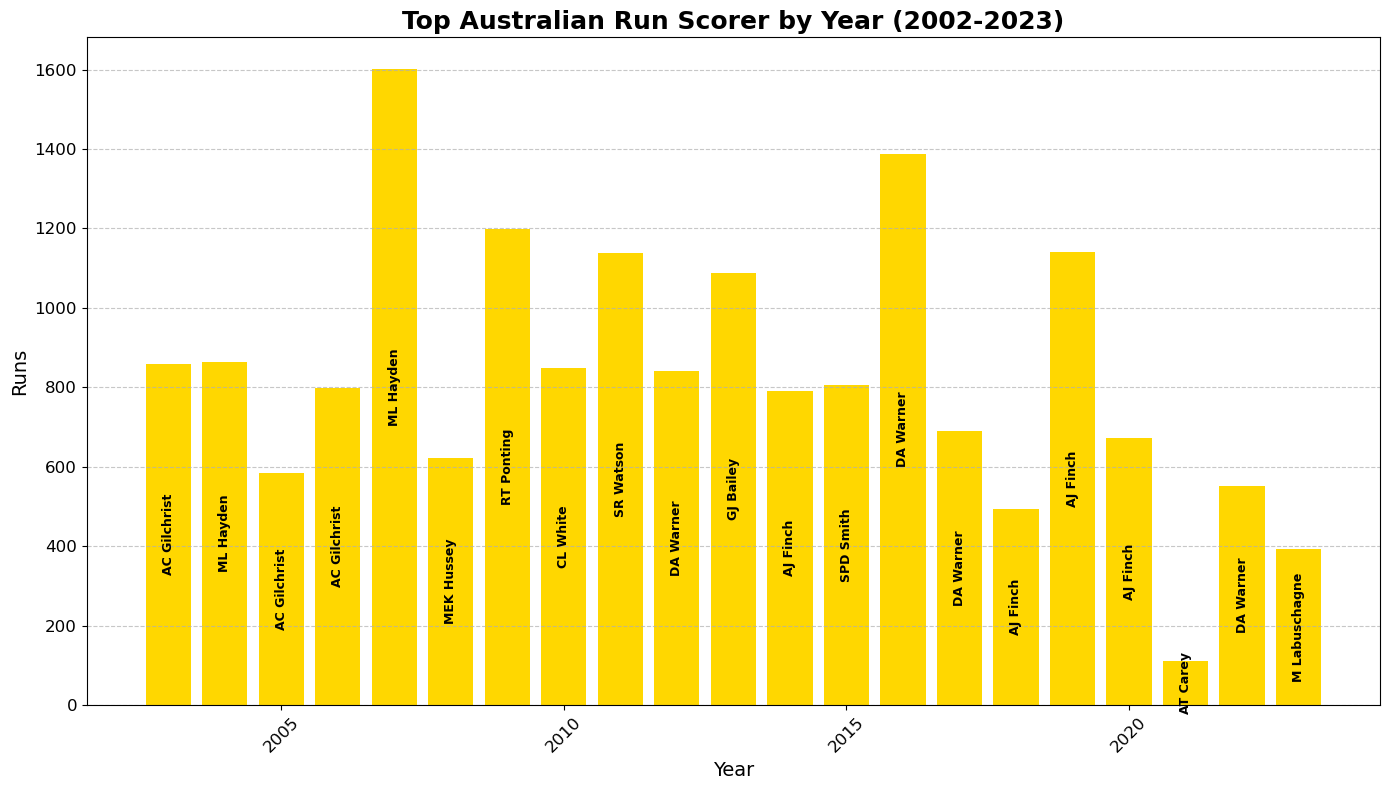

In [343]:
# Plot the results
plt.figure(figsize=(14, 8))
plt.bar(top_scorers_australian_each_year['Year'], top_scorers_australian_each_year['runs_off_bat'], color='gold')

# Adding text labels inside each bar
for i in range(len(top_scorers_australian_each_year)):
    plt.text(top_scorers_australian_each_year['Year'].iloc[i], 
             top_scorers_australian_each_year['runs_off_bat'].iloc[i] / 2,  # Position the text in the middle of the bar
             top_scorers_australian_each_year['striker'].iloc[i], 
             ha='center', va='center', rotation=90, fontsize=9, color='black', fontweight='bold')  # Centered vertically and horizontally

# Enhancements
plt.xlabel('Year', fontsize=14)
plt.ylabel('Runs', fontsize=14)
plt.title('Top Australian Run Scorer by Year (2002-2023)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Most Wickets by Australian Bowler (2002-2023)

In [5]:
# Convert the 'start_date' column to datetime already done in Top Run Scorer Batsman

# Extract the year already done in Top Run Scorer Batsman

In [322]:
# Filter the data to include only Australian bowlers (assuming 'bowling_team' column exists)
australian_bowlers_data = odi_match_data[odi_match_data['bowling_team'] == 'Australia']

In [323]:
# Filter the data to include only instances where a wicket was taken
wicket_data_australian = australian_bowlers_data[australian_bowlers_data['wicket_type'].notnull()]

# Aggregate wickets by year and bowler
yearly_wickets_australian = wicket_data_australian.groupby(['Year', 'bowler'])['wicket_type'].count().reset_index()

# Identify the top wicket-taker for each year
top_wicket_takers_australian_each_year = yearly_wickets_australian.loc[yearly_wickets_australian.groupby('Year')['wicket_type'].idxmax()]

# Filter the data for years 2002 to 2023
top_wicket_takers_australian_each_year = top_wicket_takers_australian_each_year[top_wicket_takers_australian_each_year['Year'].between(2002, 2023)]

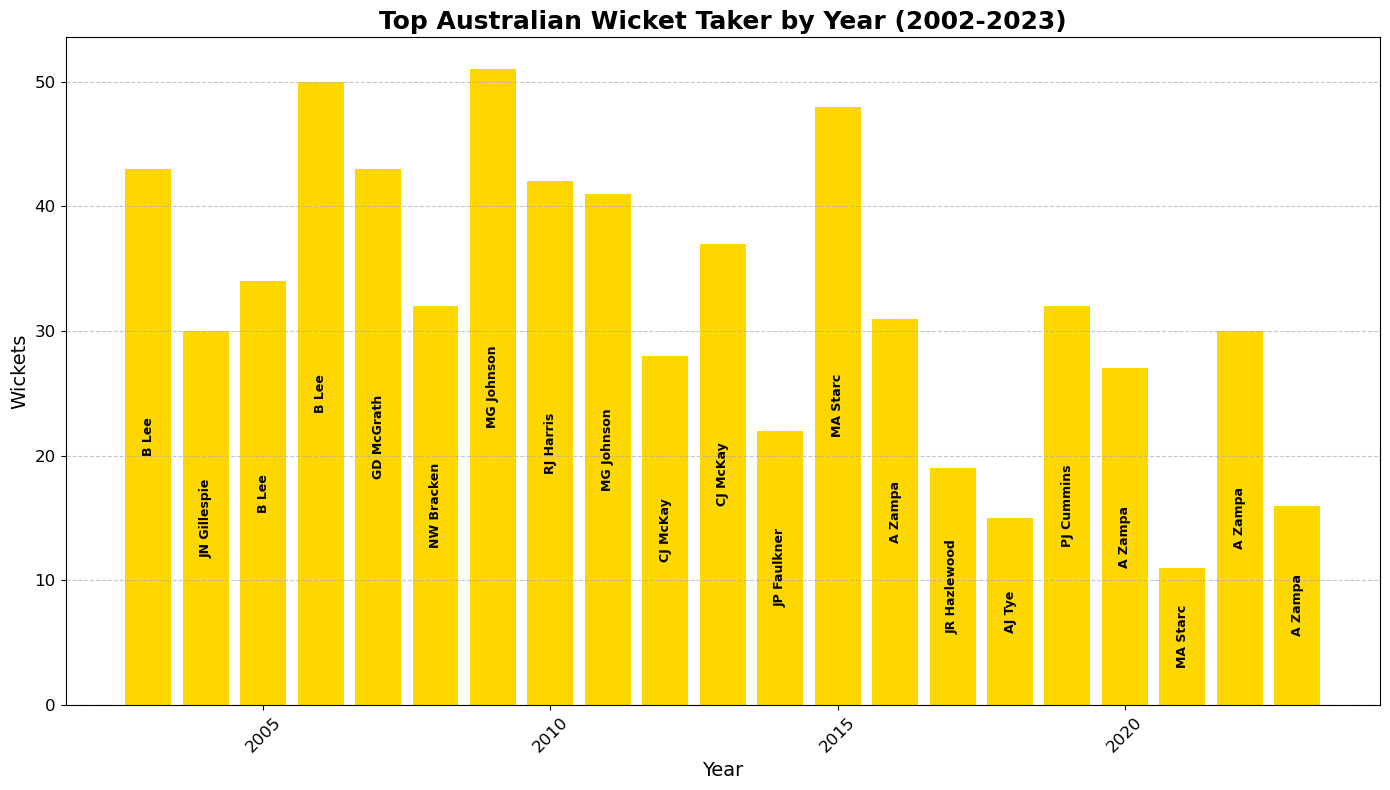

In [345]:
# Plot the results
plt.figure(figsize=(14, 8))
plt.bar(top_wicket_takers_australian_each_year['Year'], top_wicket_takers_australian_each_year['wicket_type'], color='gold')

# Adding text labels inside each bar
for i in range(len(top_wicket_takers_australian_each_year)):
    plt.text(top_wicket_takers_australian_each_year['Year'].iloc[i], 
             top_wicket_takers_australian_each_year['wicket_type'].iloc[i] / 2,  # Position the text in the middle of the bar
             top_wicket_takers_australian_each_year['bowler'].iloc[i], 
             ha='center', va='center', rotation=90, fontsize=9, color='black', fontweight='bold')  # Centered vertically and horizontally

# Enhancements
plt.xlabel('Year', fontsize=14)
plt.ylabel('Wickets', fontsize=14)
plt.title('Top Australian Wicket Taker by Year (2002-2023)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## 4. England

## Most Runs by English Batsman (2002-2023)

In [6]:
# Convert the 'start_date' column to datetime already done in Top Run Scorer Batsman

# Extract the year already done in Top Run Scorer Batsman

In [325]:
# Filter the data to include only England batsmen (assuming 'batting_team' column exists)
england_batsmen_data = odi_match_data[odi_match_data['batting_team'] == 'England']

# Aggregate runs by year and batsman (striker)
yearly_runs_england = england_batsmen_data.groupby(['Year', 'striker'])['runs_off_bat'].sum().reset_index()

# Identify the top scorer for each year
top_scorers_england_each_year = yearly_runs_england.loc[yearly_runs_england.groupby('Year')['runs_off_bat'].idxmax()]

# Filter the data for years 2002 to 2023
top_scorers_england_each_year = top_scorers_england_each_year[top_scorers_england_each_year['Year'].between(2002, 2023)]

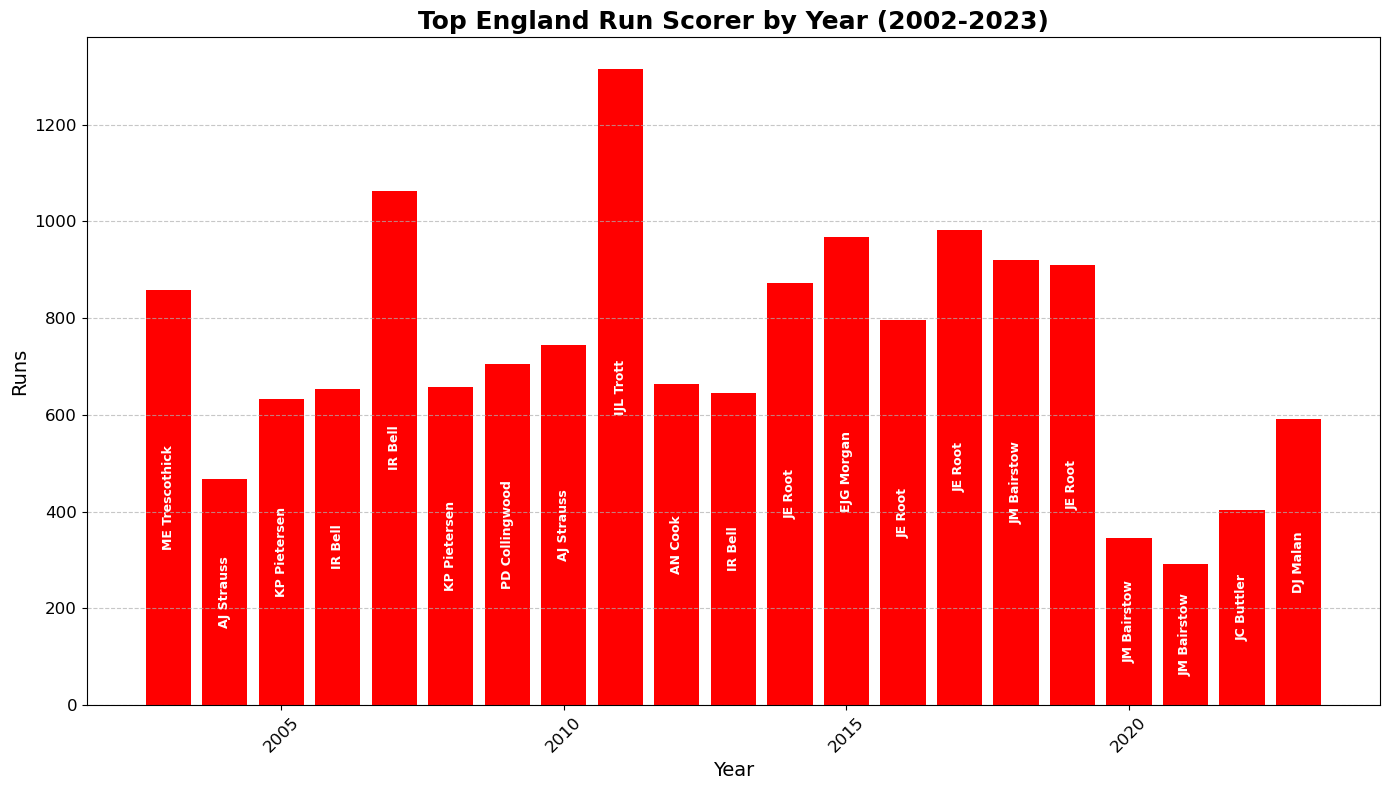

In [346]:
# Plot the results
plt.figure(figsize=(14, 8))
plt.bar(top_scorers_england_each_year['Year'], top_scorers_england_each_year['runs_off_bat'], color='red')

# Adding text labels inside each bar
for i in range(len(top_scorers_england_each_year)):
    plt.text(top_scorers_england_each_year['Year'].iloc[i], 
             top_scorers_england_each_year['runs_off_bat'].iloc[i] / 2,  # Position the text in the middle of the bar
             top_scorers_england_each_year['striker'].iloc[i], 
             ha='center', va='center', rotation=90, fontsize=9, color='white', fontweight='bold')  # Centered vertically and horizontally

# Enhancements
plt.xlabel('Year', fontsize=14)
plt.ylabel('Runs', fontsize=14)
plt.title('Top England Run Scorer by Year (2002-2023)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Most Wickets by English Bowler (2002-2023)

In [7]:
# Convert the 'start_date' column to datetime already done in Top Run Scorer Batsman

# Extract the year already done in Top Run Scorer Batsman

In [327]:
# Filter the data to include only England bowlers (assuming 'bowling_team' column exists)
england_bowlers_data = odi_match_data[odi_match_data['bowling_team'] == 'England']

# Filter the data to include only instances where a wicket was taken
wicket_data_england = england_bowlers_data[england_bowlers_data['wicket_type'].notnull()]

# Aggregate wickets by year and bowler
yearly_wickets_england = wicket_data_england.groupby(['Year', 'bowler'])['wicket_type'].count().reset_index()

# Identify the top wicket-taker for each year
top_wicket_takers_england_each_year = yearly_wickets_england.loc[yearly_wickets_england.groupby('Year')['wicket_type'].idxmax()]

# Filter the data for years 2002 to 2023
top_wicket_takers_england_each_year = top_wicket_takers_england_each_year[top_wicket_takers_england_each_year['Year'].between(2002, 2023)]

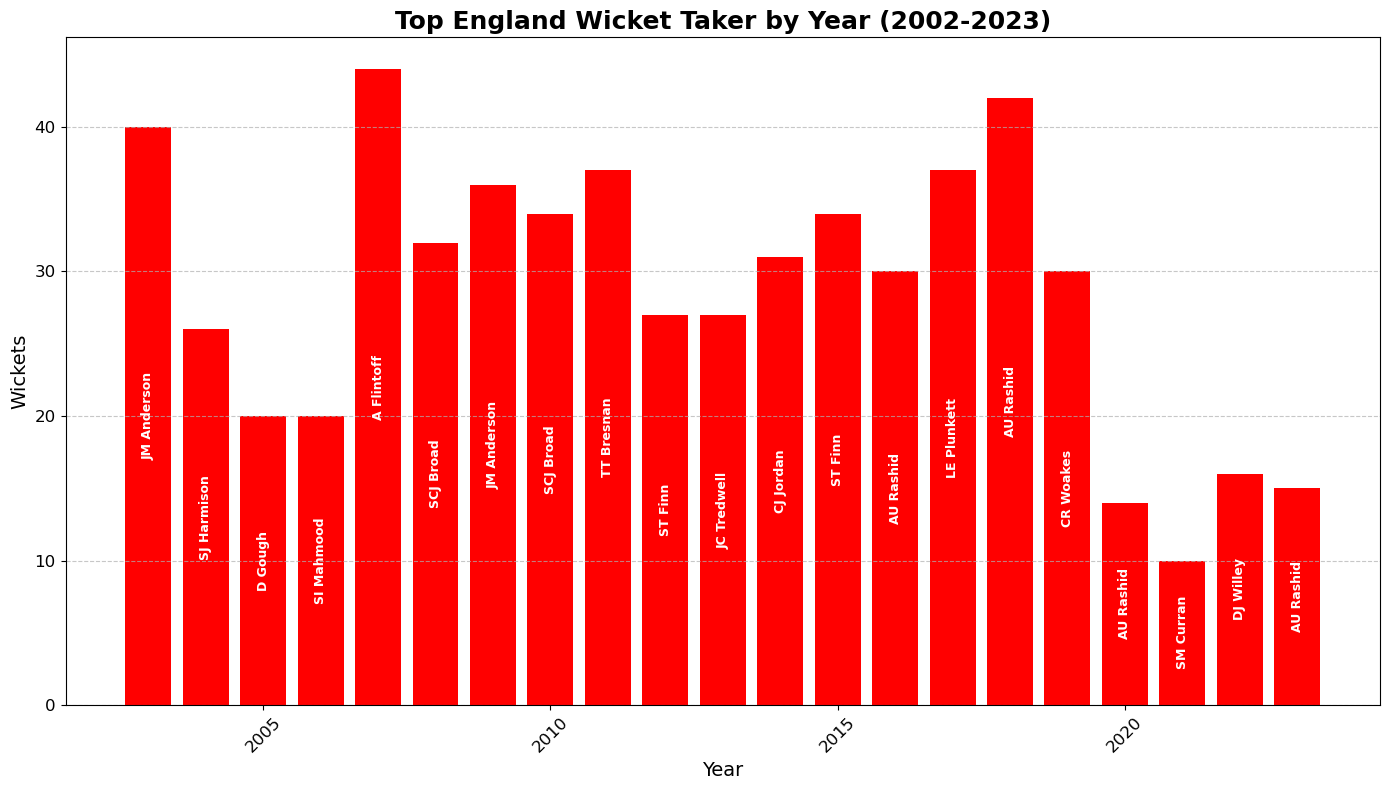

In [349]:
# Plot the results
plt.figure(figsize=(14, 8))
plt.bar(top_wicket_takers_england_each_year['Year'], top_wicket_takers_england_each_year['wicket_type'], color='red')

# Adding text labels inside each bar
for i in range(len(top_wicket_takers_england_each_year)):
    plt.text(top_wicket_takers_england_each_year['Year'].iloc[i], 
             top_wicket_takers_england_each_year['wicket_type'].iloc[i] / 2,  # Position the text in the middle of the bar
             top_wicket_takers_england_each_year['bowler'].iloc[i], 
             ha='center', va='center', rotation=90, fontsize=9, color='white', fontweight='bold')  # Centered vertically and horizontally

# Enhancements
plt.xlabel('Year', fontsize=14)
plt.ylabel('Wickets', fontsize=14)
plt.title('Top England Wicket Taker by Year (2002-2023)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## 5. South Africa

## Most Runs by South African Batsman (2002-2023)

In [8]:
# Convert the 'start_date' column to datetime already done in Top Run Scorer Batsman

# Extract the year already done in Top Run Scorer Batsman

In [329]:
# Filter the data to include only South African batsmen (assuming 'batting_team' column exists)
south_african_batsmen_data = odi_match_data[odi_match_data['batting_team'] == 'South Africa']

# Aggregate runs by year and batsman (striker)
yearly_runs_south_african = south_african_batsmen_data.groupby(['Year', 'striker'])['runs_off_bat'].sum().reset_index()

# Identify the top scorer for each year
top_scorers_south_african_each_year = yearly_runs_south_african.loc[yearly_runs_south_african.groupby('Year')['runs_off_bat'].idxmax()]

# Filter the data for years 2002 to 2023
top_scorers_south_african_each_year = top_scorers_south_african_each_year[top_scorers_south_african_each_year['Year'].between(2002, 2023)]

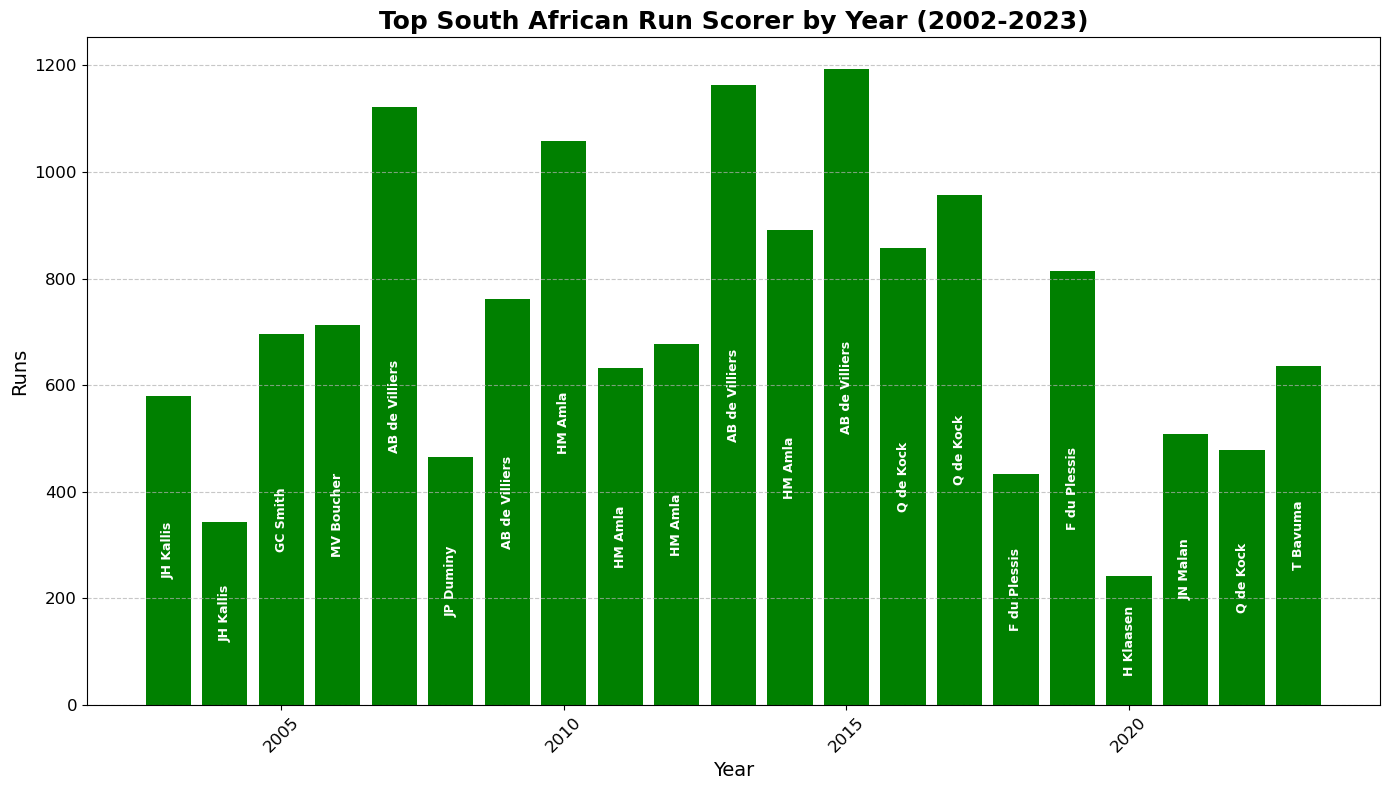

In [350]:
# Plot the results
plt.figure(figsize=(14, 8))
plt.bar(top_scorers_south_african_each_year['Year'], top_scorers_south_african_each_year['runs_off_bat'], color='green')

# Adding text labels inside each bar
for i in range(len(top_scorers_south_african_each_year)):
    plt.text(top_scorers_south_african_each_year['Year'].iloc[i], 
             top_scorers_south_african_each_year['runs_off_bat'].iloc[i] / 2,  # Position the text in the middle of the bar
             top_scorers_south_african_each_year['striker'].iloc[i], 
             ha='center', va='center', rotation=90, fontsize=9, color='white', fontweight='bold')  # Centered vertically and horizontally

# Enhancements
plt.xlabel('Year', fontsize=14)
plt.ylabel('Runs', fontsize=14)
plt.title('Top South African Run Scorer by Year (2002-2023)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Most Wickets by South African Bowler (2002-2023)

In [9]:
# Convert the 'start_date' column to datetime already done in Top Run Scorer Batsman

# Extract the year already done in Top Run Scorer Batsman

In [331]:
# Filter the data to include only South African bowlers (assuming 'bowling_team' column exists)
south_african_bowlers_data = odi_match_data[odi_match_data['bowling_team'] == 'South Africa']

# Filter the data to include only instances where a wicket was taken
wicket_data_south_african = south_african_bowlers_data[south_african_bowlers_data['wicket_type'].notnull()]

# Aggregate wickets by year and bowler
yearly_wickets_south_african = wicket_data_south_african.groupby(['Year', 'bowler'])['wicket_type'].count().reset_index()

# Identify the top wicket-taker for each year
top_wicket_takers_south_african_each_year = yearly_wickets_south_african.loc[yearly_wickets_south_african.groupby('Year')['wicket_type'].idxmax()]

# Filter the data for years 2002 to 2023
top_wicket_takers_south_african_each_year = top_wicket_takers_south_african_each_year[top_wicket_takers_south_african_each_year['Year'].between(2002, 2023)]

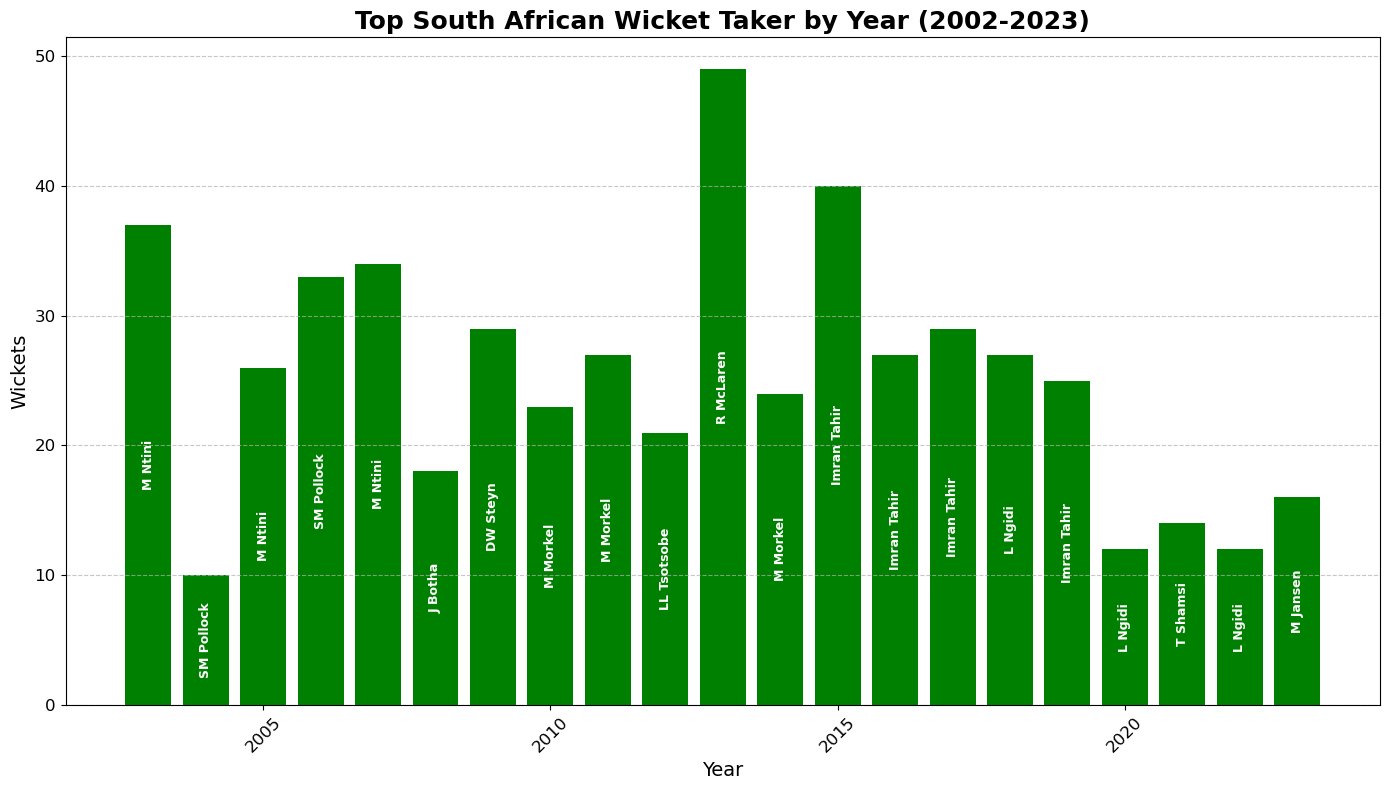

In [351]:
# Plot the results
plt.figure(figsize=(14, 8))
plt.bar(top_wicket_takers_south_african_each_year['Year'], top_wicket_takers_south_african_each_year['wicket_type'], color='green')

# Adding text labels inside each bar
for i in range(len(top_wicket_takers_south_african_each_year)):
    plt.text(top_wicket_takers_south_african_each_year['Year'].iloc[i], 
             top_wicket_takers_south_african_each_year['wicket_type'].iloc[i] / 2,  # Position the text in the middle of the bar
             top_wicket_takers_south_african_each_year['bowler'].iloc[i], 
             ha='center', va='center', rotation=90, fontsize=9, color='white', fontweight='bold')  # Centered vertically and horizontally

# Enhancements
plt.xlabel('Year', fontsize=14)
plt.ylabel('Wickets', fontsize=14)
plt.title('Top South African Wicket Taker by Year (2002-2023)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## 6. New Zealand

## Most Runs by New Zealand Batsman (2002-2023)

In [10]:
# Convert the 'start_date' column to datetime already done in Top Run Scorer Batsman

# Extract the year already done in Top Run Scorer Batsman

In [333]:
# Filter the data to include only New Zealand batsmen (assuming 'batting_team' column exists)
nz_batsmen_data = odi_match_data[odi_match_data['batting_team'] == 'New Zealand']

# Aggregate runs by year and batsman (striker)
yearly_runs_nz = nz_batsmen_data.groupby(['Year', 'striker'])['runs_off_bat'].sum().reset_index()

# Identify the top scorer for each year
top_scorers_nz_each_year = yearly_runs_nz.loc[yearly_runs_nz.groupby('Year')['runs_off_bat'].idxmax()]

# Filter the data for years 2002 to 2023
top_scorers_nz_each_year = top_scorers_nz_each_year[top_scorers_nz_each_year['Year'].between(2002, 2023)]

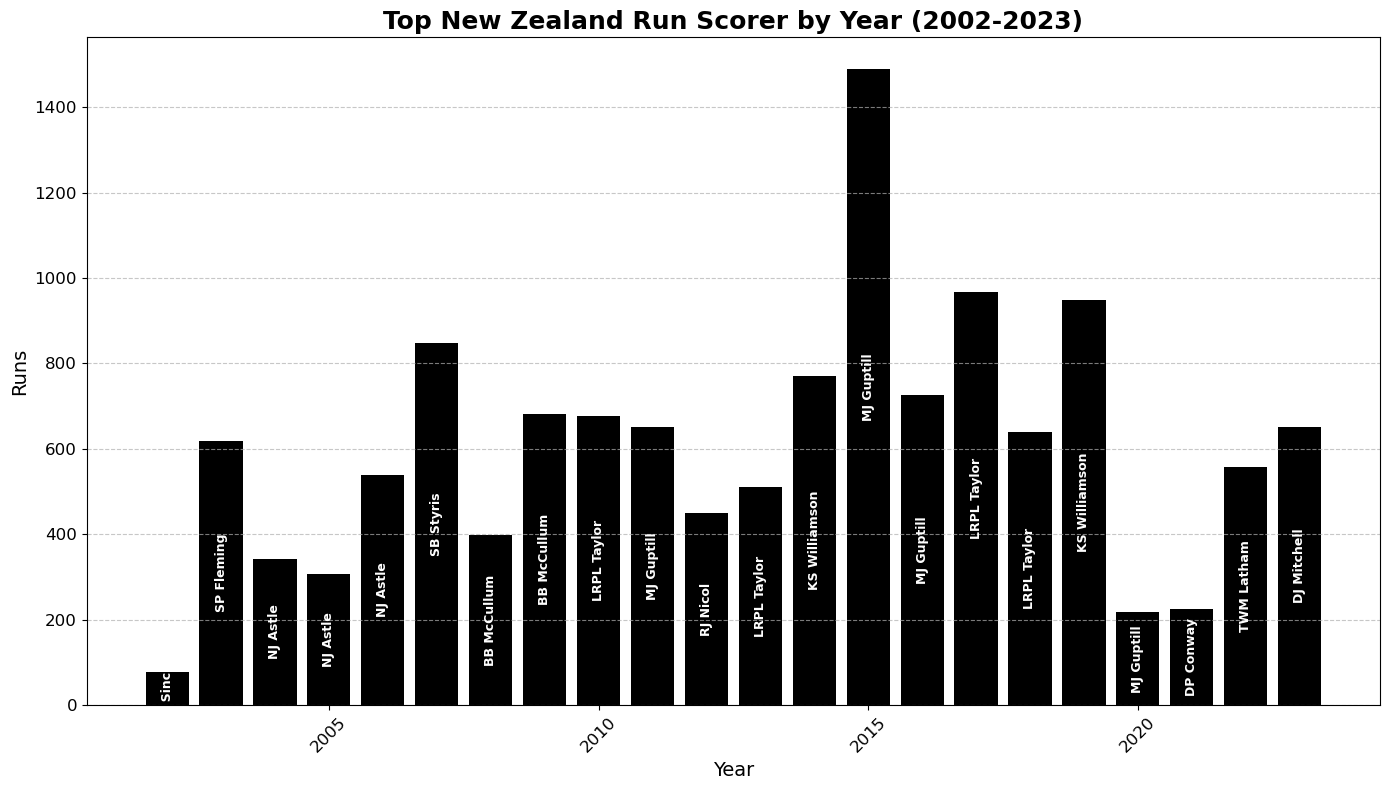

In [352]:
# Plot the results
plt.figure(figsize=(14, 8))
plt.bar(top_scorers_nz_each_year['Year'], top_scorers_nz_each_year['runs_off_bat'], color='black')

# Adding text labels inside each bar
for i in range(len(top_scorers_nz_each_year)):
    plt.text(top_scorers_nz_each_year['Year'].iloc[i], 
             top_scorers_nz_each_year['runs_off_bat'].iloc[i] / 2,  # Position the text in the middle of the bar
             top_scorers_nz_each_year['striker'].iloc[i], 
             ha='center', va='center', rotation=90, fontsize=9, color='white', fontweight='bold')  # Centered vertically and horizontally

# Enhancements
plt.xlabel('Year', fontsize=14)
plt.ylabel('Runs', fontsize=14)
plt.title('Top New Zealand Run Scorer by Year (2002-2023)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

## Most Wickets by New Zealand Bowler (2002-2023)

In [11]:
# Convert the 'start_date' column to datetime already done in Top Run Scorer Batsman

# Extract the year already done in Top Run Scorer Batsman

In [335]:
# Filter the data to include only New Zealand bowlers (assuming 'bowling_team' column exists)
nz_bowlers_data = odi_match_data[odi_match_data['bowling_team'] == 'New Zealand']

# Filter the data to include only instances where a wicket was taken
wicket_data_nz = nz_bowlers_data[nz_bowlers_data['wicket_type'].notnull()]

# Aggregate wickets by year and bowler
yearly_wickets_nz = wicket_data_nz.groupby(['Year', 'bowler'])['wicket_type'].count().reset_index()

# Identify the top wicket-taker for each year
top_wicket_takers_nz_each_year = yearly_wickets_nz.loc[yearly_wickets_nz.groupby('Year')['wicket_type'].idxmax()]

# Filter the data for years 2002 to 2023
top_wicket_takers_nz_each_year = top_wicket_takers_nz_each_year[top_wicket_takers_nz_each_year['Year'].between(2002, 2023)]

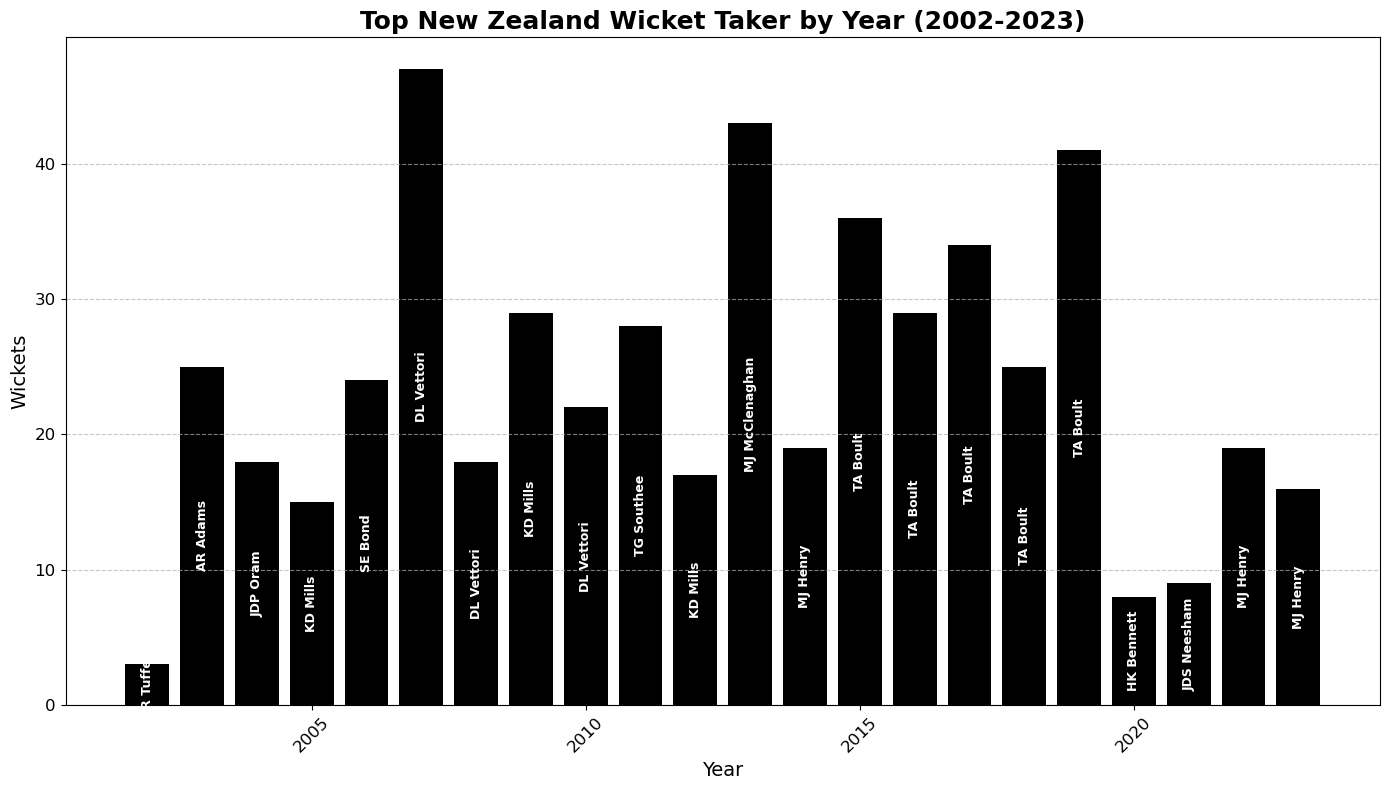

In [353]:
# Plot the results
plt.figure(figsize=(14, 8))
plt.bar(top_wicket_takers_nz_each_year['Year'], top_wicket_takers_nz_each_year['wicket_type'], color='black')

# Adding text labels inside each bar
for i in range(len(top_wicket_takers_nz_each_year)):
    plt.text(top_wicket_takers_nz_each_year['Year'].iloc[i], 
             top_wicket_takers_nz_each_year['wicket_type'].iloc[i] / 2,  # Position the text in the middle of the bar
             top_wicket_takers_nz_each_year['bowler'].iloc[i], 
             ha='center', va='center', rotation=90, fontsize=9, color='white', fontweight='bold')  # Centered vertically and horizontally

# Enhancements
plt.xlabel('Year', fontsize=14)
plt.ylabel('Wickets', fontsize=14)
plt.title('Top New Zealand Wicket Taker by Year (2002-2023)', fontsize=18, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()